<div style="border:solid green 2px; padding: 20px">
<b>Максим, привет!</b>

Меня зовут Георгий, и я буду проверять твой проект. Предлагаю общаться на «ты» :) Но если это не удобно - дай(те) знать, и мы перейдем на «вы». 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Уже проделана большая работа над проектом, но давай сделаем его еще лучше! Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарии ревьюера:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарии ревьюера:</b> Так выделены небольшие замечания. Одно-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. </div>

<div class="alert alert-success">
<b>Комментарии ревьюера:</b> Так я выделяю все остальные комментарии, твои удачные решения, а также комментарии по твоим промежуточным выводам и рассуждениям.</div>

<div class="alert alert-success">
<b>Общий фидбек:</b> 
    
Мне очень понравился твой проект. Работа проделана, действительно, огромная! Хочется особенно отметить:
    
- детализированные технические и аналитические выводы
- то как ты структурируешь код - шикарно!
- документация к коду - огонь
- визуализация прекрасна
    
Всё сделано очень качественно. В качестве рекомендаций для будущих проектов:
    
- продолжать столь же круто делать исследования, это правда впечатляет :)
- не забывать про подписи на всех графиках
- иногда лучше разделить большую и плотную ячейку с кодом на несколько
- после # оставлять пробел
- чтобы не выводилась техническая информация над графиком - используй plt.show() или ;
- в самом начале проекта круто было бы видеть table of contents - навигацию по разделам
- хотелось бы больше форматирования markdown
    

Личные рекомендации:
- попробуй https://plotly.com/python/ :) 
- если вдруг захочешь делать интерактивные аналитические веб-приложения, то очень cоветую посмотреть https://streamlit.io/, сейчас на основной работе его раскатываем :)
    

На мой взгляд, твоя работа претендует на одну из лучших, поэтому я бы хотел вернуть тебе её на доработку. Если есть желание и время - будет круто, если получится внести косметические правки и тогда я направляю в её в банк лучших работ. В ином случае - отправляй как есть - я её зачту. Очень уж понравилась!
    
Спасибо! 
</div>

<div class="alert alert-success">
Ответ студента:
Георгий, большое тебе спасибо за внимание к моей работе и воодушевляющие комментарии, которые, действительно мотивируют расти и развиваться дальше - дают надежду! Мне очень-очень приятно и я, действительно, очень тебе благодарен за внимательное прочтение моего проекта! Итак, я почти все исправил, из того, что ты предложил. Внес косметические правки - однако, не везде , наверное , разбил большие коды на несколько строчек. К самому себе у меня есть замечание - я не записал автоматизировал выдачу графиков через функции - местами мне показалось это не актуально через функции и grooupby - однако, я хочу в дальнейшем испозовать такие алгоритмы. Также хочу научиться строить интерактивные графики с навидением курсором. 
Очень рассчитываю на то, что с отработкой замечаний я справился. Если что, пожалуйста, дай знать. Спасибо!
С Уважением,
Мандрик Максим

# Исследование объявлений о продаже квартир

    В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

    По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [136]:
# Загрузим все необходимые библиотеки для исследования
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Укажем удобный формат вывода для чисел с плавающей точкой float (до 3 знаков после точки)
pd.options.display.float_format = '{:.3f}'.format

In [137]:
# Прочитаем датасет, укажем релевантный разделитель в качестве формата парсинга данных, настройки encoding не требуются.
df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
# Вывкдем первые пять строк датасета для первичного ознакомления с данными
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.000,108.000,2019-03-07T00:00:00,3,2.700,16.000,51.000,8,NaN,...,25.000,nan,Санкт-Петербург,18863.000,16028.000,1.000,482.000,2.000,755.000,nan
1,7,3350000.000,40.400,2018-12-04T00:00:00,1,nan,11.000,18.600,1,NaN,...,11.000,2.000,посёлок Шушары,12817.000,18603.000,0.000,nan,0.000,nan,81.000
2,10,5196000.000,56.000,2015-08-20T00:00:00,2,nan,5.000,34.300,4,NaN,...,8.300,0.000,Санкт-Петербург,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000
3,0,64900000.000,159.000,2015-07-24T00:00:00,3,nan,14.000,nan,9,NaN,...,nan,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000
4,2,10000000.000,100.000,2018-06-19T00:00:00,2,3.030,14.000,32.000,13,NaN,...,41.000,nan,Санкт-Петербург,31856.000,8098.000,2.000,112.000,1.000,48.000,121.000


In [138]:
# Выведем данные о размере датасета. В распоряжении 23699 наблюдений - продаваемых квартир в срезе 22 переменных
df.shape

(23699, 22)

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> 

По pep8 после # нужен пробел :) 
</div>

In [139]:
# Выведем общую информацию о типе и структуре данных. В 12 из 22 переменных есть пропущенные значения, количество которых: 
# 1) в некоторых случаях совпадает, 2) иногда достигает критического количества (более 50% выборки), 3) совсем не велико (до 5-7%) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [140]:
# Выведем количественные характеристики пропусков. По двум переменным: floors_total и locality_name - количество пропусков менее 5 %.
# По двум важным для анализа переменным: balcony, is_apartment - достигает и более 50%. Сложности вызывают другие важные переменные
# количество пропусков в которых превышает допустимую долю для удаления (living_area, kitchen_area, ceiling_height,cityCenters_n..)
df.isna().sum() / len(df)

total_images           0.000
last_price             0.000
total_area             0.000
first_day_exposition   0.000
rooms                  0.000
ceiling_height         0.388
floors_total           0.004
living_area            0.080
floor                  0.000
is_apartment           0.883
studio                 0.000
open_plan              0.000
kitchen_area           0.096
balcony                0.486
locality_name          0.002
airports_nearest       0.234
cityCenters_nearest    0.233
parks_around3000       0.233
parks_nearest          0.659
ponds_around3000       0.233
ponds_nearest          0.616
days_exposition        0.134
dtype: float64

In [141]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [142]:
# Посмотрим на совместную встречаемость пропусков в некоторых переменных 
df[np.isnan(df['living_area']) & np.isnan(df['kitchen_area'])].shape

(1464, 22)

In [143]:
df[np.isnan(df['cityCenters_nearest']) & np.isnan(df['airports_nearest'])].shape

(5518, 22)

In [144]:
df[np.isnan(df['ceiling_height']) & np.isnan(df['living_area'])].shape

(1106, 22)

In [145]:
# Проверим, какие населенные пункты присутствуют в данных. Населенные пункты входят в состав Санкт-Петербурга и Лен. обл.
city_group = df.groupby('locality_name')['locality_name'].agg('count')
towns = list(city_group.keys())
towns

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

In [146]:
# Посмотрим на статистику некоторых выборочных значений необходимых для анализа переменных
df_info = df[['last_price', 'total_area', 'living_area', 'kitchen_area', 'cityCenters_nearest', 'days_exposition']]
df_info.describe()

,last_price,total_area,living_area,kitchen_area,cityCenters_nearest,days_exposition
count,23699.000,23699.000,21796.000,21421.000,18180.000,20518.000
mean,6541548.772,60.349,34.458,10.570,14191.278,180.889
std,10887013.268,35.654,22.030,5.905,8608.386,219.728
min,12190.000,12.000,2.000,1.300,181.000,1.000
25%,3400000.000,40.000,18.600,7.000,9238.000,45.000
50%,4650000.000,52.000,30.000,9.100,13098.500,95.000
75%,6800000.000,69.900,42.300,12.000,16293.000,232.000
max,763000000.000,900.000,409.700,112.000,65968.000,1580.000


### Вывод

    В представленном для анализа данных 23699 объявлений о продаже квартир, в которых (по тем или иным причинам) отсутствует от 3 до 90 % данных по выборочным переменным - физическим, топологическим и рыночным характеристикам.
    Некоторые отсутствующие значения имеют тесное совместное распределение, что позволяет местами предположить логическую парадигму наличия пропусков - т.е. отсутствующие значения - свидетельствуют о том, что конкретными характеристиками выставленная на продажу квартира не обладает (например: наличие парков в радиусе 3 км., близость к аэропорту и центру города. Подкрепляет это предположение, например, отсутствующие значения в наличии балкона и львинная доля пропусков в значениях - булиевой переменной (Апартамент: да/нет).

    Описательная статистика некоторых выборочных (релевантных) в рамках анализа переменных свидетельствует уже на первичного аналитическом этапе о чрезвычайной гетерогенности значений - критически широким "разбросе" значений данных. Так, 1) разница между максимальным и минимальным значением цены квартиры составляет примерно 760.000.000, 2) разница между максимальным и минимальным значением общей площади квартиры составляет примерно 880 кв. м. (в жилой площади и площади кухни масштаб дифференциации - относительно аналогичный), 3) в данных пристутствуют объявления с экстреамально высокими и необычно низкими показателями скорости продажи квартир. 

    Наличие в данных о продаваемых квартирах широкого диапозона близости к географическим городским центрам (от 0.2 до 66 км) - заслуживает отдельного внимания - теоретически, мы можем предположить об унифицированной системе исчисления дистанции от центра конкретно г. Санкт-Петербург, принимая во внимания тот факт, что объявления о продажах квартир в других городах относятся к Ленинградской обл.




### Шаг 2. Предобработка данных

    Прежде, чем приступить к предобработке данных по заполнению пропусков и приведению типов, обратим внимание на одну из ключевых переменных locality_name ("Населенный пункт").
    Отсутствующие значения в данной переменной, с одной стороны, на самом старте усложнит задачу заполнения пропущенных значений по другим переменным, одним из главных группирующим звеном которых является "населенный пункт", с другой - количество отстутствующих значений в этой переменной чрезвычайно невелико - 2% (49 городов), что дает перспективу удаления пропущенных значений этой переменной.
    Чтобы проверить, насколько конкретное удаление переменной скажется на выборке, обратимся к анализу распределения стоимости квартиры - главной зависимой переменной конкретного проекта, с наличием и отсутствием пропущенных значений по городам - и определим, насколько влияют пропущенные значения на нашу выборку.   

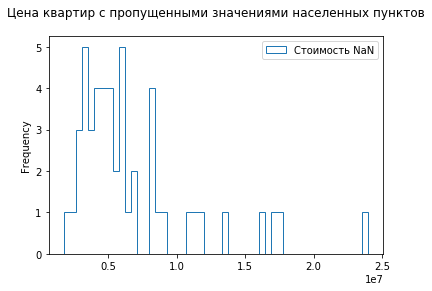

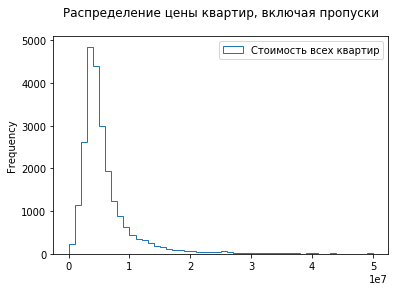

In [147]:
# Построим график распределения цены квартир с пропущенными значениями населенных пунктов, а также всех квартир с пропусками,
# предварительно установив диапозон значений цены в 50 млн. рублей, чтобы оценить потенциальное наличие выбросов в удаляемых значениях.
df[df['locality_name'].isnull()].plot(kind='hist', y='last_price', histtype='step' ,bins=50, label='Стоимость NaN')
plt.title("Цена квартир с пропущенными значениями населенных пунктов", pad=20);
ax = df.plot(kind='hist', y='last_price', histtype='step', bins=50, range=(0, 50000000), label='Стоимость всех квартир')
plt.title('Распределение цены квартир, включая пропуски', pad=20);

        Посмотрим на распределение цены в пропусках с квартирами, в которых не указано общее количество этажей. Теоретически - этот фактор должен определять финальную стоимость цены за квартиру. Однако, не располагая ни серией дома, ни какой-либо другой дополнительной информацией о доме, в котором продается квартира, мы не можем апроксимировать по значениям других переменных общее количество этажей. Также следует отметить, что количество пропусков в этой переменно - 4 % от общей выборки - это позволяет нам обратиться к удалению таких квартир из дата_сета. 

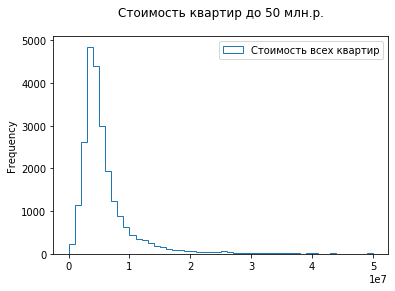

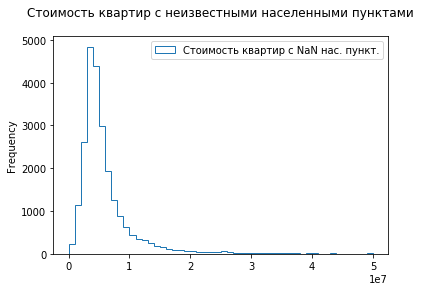

In [148]:
df.plot(kind='hist', y='last_price', histtype='step', bins=50, range=(0, 50000000), label='Стоимость всех квартир')
plt.title("Стоимость квартир до 50 млн.р.", pad=20);
df[~df['locality_name'].isnull()].plot(kind='hist', y='last_price', histtype='step' ,bins=50, range=(0, 50000000), label='Стоимость квартир с NaN нас. пункт.')
plt.title("Стоимость квартир с неизвестными населенными пунктами", pad=20);


<div class="alert alert-success">
<b>Комментарий ревьюера:</b> 

Здесь бы названия графиков :)
</div>

In [149]:
# Избавимся от кв. с пропущенными значениями населенных пунктов и сохраним отфильтрованный датасет в новую переменную для анализа
df_filtered = df[~df['locality_name'].isnull() & ~df['floors_total'].isnull()]
df_filtered

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.000,108.000,2019-03-07T00:00:00,3,2.700,16.000,51.000,8,NaN,...,25.000,nan,Санкт-Петербург,18863.000,16028.000,1.000,482.000,2.000,755.000,nan
1,7,3350000.000,40.400,2018-12-04T00:00:00,1,nan,11.000,18.600,1,NaN,...,11.000,2.000,посёлок Шушары,12817.000,18603.000,0.000,nan,0.000,nan,81.000
2,10,5196000.000,56.000,2015-08-20T00:00:00,2,nan,5.000,34.300,4,NaN,...,8.300,0.000,Санкт-Петербург,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000
3,0,64900000.000,159.000,2015-07-24T00:00:00,3,nan,14.000,nan,9,NaN,...,nan,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000
4,2,10000000.000,100.000,2018-06-19T00:00:00,2,3.030,14.000,32.000,13,NaN,...,41.000,nan,Санкт-Петербург,31856.000,8098.000,2.000,112.000,1.000,48.000,121.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.000,133.810,2017-03-21T00:00:00,3,3.700,5.000,73.300,3,NaN,...,13.830,nan,Санкт-Петербург,24665.000,4232.000,1.000,796.000,3.000,381.000,nan
23695,14,3100000.000,59.000,2018-01-15T00:00:00,3,nan,5.000,38.000,4,NaN,...,8.500,nan,Тосно,nan,nan,nan,nan,nan,nan,45.000
23696,18,2500000.000,56.700,2018-02-11T00:00:00,2,nan,3.000,29.700,1,NaN,...,nan,nan,село Рождествено,nan,nan,nan,nan,nan,nan,nan
23697,13,11475000.000,76.750,2017-03-28T00:00:00,2,3.000,17.000,nan,12,NaN,...,23.300,2.000,Санкт-Петербург,39140.000,10364.000,2.000,173.000,3.000,196.000,602.000


<div class="alert alert-success">
<b>Комментарий ревьюера:</b> 

Альтернативный способ фильтрации:   df.query('~locality_name.isnull() & ~floors_total.isnull()')
    
   
Хотя тот, что у тебя, мне нравится больше :)

</div>

In [150]:
df_filtered = df_filtered.dropna(subset=['locality_name', 'floors_total'])
df_filtered = df_filtered.reset_index(drop=True)
df_filtered

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.000,108.000,2019-03-07T00:00:00,3,2.700,16.000,51.000,8,NaN,...,25.000,nan,Санкт-Петербург,18863.000,16028.000,1.000,482.000,2.000,755.000,nan
1,7,3350000.000,40.400,2018-12-04T00:00:00,1,nan,11.000,18.600,1,NaN,...,11.000,2.000,посёлок Шушары,12817.000,18603.000,0.000,nan,0.000,nan,81.000
2,10,5196000.000,56.000,2015-08-20T00:00:00,2,nan,5.000,34.300,4,NaN,...,8.300,0.000,Санкт-Петербург,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000
3,0,64900000.000,159.000,2015-07-24T00:00:00,3,nan,14.000,nan,9,NaN,...,nan,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000
4,2,10000000.000,100.000,2018-06-19T00:00:00,2,3.030,14.000,32.000,13,NaN,...,41.000,nan,Санкт-Петербург,31856.000,8098.000,2.000,112.000,1.000,48.000,121.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23560,9,9700000.000,133.810,2017-03-21T00:00:00,3,3.700,5.000,73.300,3,NaN,...,13.830,nan,Санкт-Петербург,24665.000,4232.000,1.000,796.000,3.000,381.000,nan
23561,14,3100000.000,59.000,2018-01-15T00:00:00,3,nan,5.000,38.000,4,NaN,...,8.500,nan,Тосно,nan,nan,nan,nan,nan,nan,45.000
23562,18,2500000.000,56.700,2018-02-11T00:00:00,2,nan,3.000,29.700,1,NaN,...,nan,nan,село Рождествено,nan,nan,nan,nan,nan,nan,nan
23563,13,11475000.000,76.750,2017-03-28T00:00:00,2,3.000,17.000,nan,12,NaN,...,23.300,2.000,Санкт-Петербург,39140.000,10364.000,2.000,173.000,3.000,196.000,602.000


In [151]:
df_filtered.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                 11475
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [152]:
df_filtered.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

    Приступим к замене пропущенных значений тех переменных, где возможна апроксимация 1) на основе сгруппированных значений других переменных, в зависимости от степени насыщенности этих категорий, 2) с помощью логических выводов о пропусках в данных.
    Интересующие нас переменные:
    Количество балконов, Апартамент, Жилая площадь, Площадь Кухни, Высота потолков, Количество дней до снятия объявления (*предположительно продажи*), Близость аэропорта (в м.), Близость центра города (в м.)


In [153]:
# Пропущенные значения в количестве балконов, гипотетически, свидетельствуют о том, что в продаваемых квартирах их нет. 
# Заменим пропущенные значения на 0.
df_filtered['balcony'] = df_filtered['balcony'].fillna(0)
# Округлим количество балконов до целых чисел и приведем к переменной interge
df_filtered['balcony'] = df_filtered['balcony'].round()
df_filtered['balcony'] = df_filtered['balcony'].astype('int64')

In [154]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

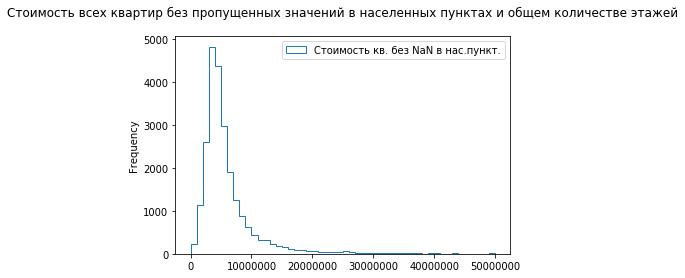

In [155]:
ax = df_filtered[~df_filtered['locality_name'].isnull()].plot(kind='hist', y='last_price', histtype='step' ,bins=50, range=(0, 50000000), label='Стоимость кв. без NaN в нас.пункт.')
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.title("Стоимость всех квартир без пропущенных значений в населенных пунктах и общем количестве этажей", pad=20);

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> 

Здесь бы формат xticks не в экспоненциальном виде + title :)

</div>

In [156]:
# Заменим пропущенные значения в переменной "Апартамент" на False: пропущенных значений этой категории слишком много, в то время как 
# гипотетически среди продаваемых квартир - апартаментов сильно меньше, чем квартир, которые можно приватизировать.
# Можно предположить, что апартаменты должны стоить меньше, чем квартиры. Однако, цены квартир с исследованным нам признаком распределены 
# крайне не равномерно, в то время как цены по Санкт-Петербургу в среднем сильно блазированы (если исключить выбросы).
df_filtered['is_apartment'] = df_filtered['is_apartment'].fillna('False')

    Заменим пропущенные значения в переменной "Жилая площадь" с помощью умножения "Общей площади" на индекс, выражающий отношение жилой к общей площади в разбивке по количеству комнат (тех квартир, в которых "Жилая площадь" указана). Таким образом, мы получим взвешенные значения. 

In [157]:
#С оздадим датасет - срез релевантных для заполнения пропусков переменных без пропущенных значений "Жилой площади" - получим 21700 кв.
df_living_area = df_filtered[['rooms', 'total_area', 'living_area']].query('living_area != "NaN"')
# Добавим в него переменную coeff - коэффициент отношения жилой площади к общей
df_living_area['coeff_liv_area'] = df_living_area['living_area'] / df_living_area['total_area']
# Создадим переменную, в которой будет хранится информация с группировами значениями средних коэффициентов по квартирам с разным количеством комнат

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
coeff_liv_area              0
dtype: int64

In [ ]:
# Создадим переменную, в которой будет хранится информация с группировами значениями средних коэффициентов по квартирам с разным количеством комнат
coefficien_living_area = df_living_area.pivot_table(index='rooms', values='coeff_liv_area')
# Приклеим к датасету для анализа таблицу с переменной с коэффициентами в зависимости от количества комнат
df_filtered = df_filtered.merge(coefficien_living_area, how='left', on='rooms')

In [ ]:
# Напишем функцию, которая принимает на вход переменную "Жилая площадь" и, в случае обнаружения пропущенных значений
# заполняет пропущенные значения результатом арифметического умножения "Общей площади" на коэффициент отношения. 
def living_area_mean(row):
    living_area = row['living_area']
    coeff = row['coeff_liv_area']
    total_area = row['total_area']
    if np.isnan(living_area):
        return coeff * total_area
    return living_area 
    
df_filtered['living_area'] = df_filtered.apply(living_area_mean, axis = 1)
# Проверим, заменились ли пропуски
df_filtered.isna().sum()


<div class="alert alert-warning">
<b>Комментарий ревьюера:</b> 

Очень круто, что выбрал такой способ заполнения пропусков! Если код довольно плотно ложится в ячейке - лучше её разделить на несколько. Так улучшится читаемость :) Это относится и к другим подобным ячейкам (на будущее).

</div>

    Заменим пропущенные значения в переменной "Площадь кухни" с помощью умножения "Жилой площади" на индекс, выражающий отношение площади кухни к общей площади в разбивке по количеству комнат (тех квартир, в которых "Площадь кухни" указана). Таким образом, мы получим взвешенные значения. 

In [158]:
# Создадим датасет - срез релевантных для заполнения пропусков переменных без пропущенных значений "Жилой площади" - получим 21700 кв.
df_kitchen_area = df_filtered[['rooms', 'kitchen_area', 'living_area']].query('kitchen_area != "NaN"')
# Добавим в него переменную coeff - коэффициент отношения "Площадь кухни" к жилой
df_kitchen_area['coeff_kitch_area'] = df_kitchen_area['kitchen_area'] / df_kitchen_area['living_area']

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              194
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
coeff_liv_area              0
coeff_kitch_area          194
dtype: int64

In [ ]:
# Создадим переменную, в которой будет хранится информация с группировами значениями средних коэффициентов по квартирам с разным количеством комнат
coefficien_kitchen_area = df_kitchen_area.pivot_table(index='rooms', values='coeff_kitch_area')
# Приклеим к датасету для анализа таблицу с переменной с коэффициентами в зависимости от количества комнат
df_filtered = df_filtered.merge(coefficien_kitchen_area, how='left', on='rooms')

In [ ]:
# Напишем функцию, которая принимает на вход переменную "Площадь кухни" и, в случае обнаружения пропущенных значений
# заполняет пропущенные значения результатом арифметического умножения "Жилой площади" на коэффициент отношения. 
def kitchen_area_mean(row):
    kitchen_area = row['kitchen_area']
    coeff = row['coeff_kitch_area']
    living_area = row['living_area']
    if np.isnan(kitchen_area):
        return coeff * living_area
    return kitchen_area 
    
df_filtered['kitchen_area'] = df_filtered.apply(kitchen_area_mean, axis = 1)
# Проверим, заменились ли пропуски
df_filtered.isna().sum()

In [159]:
# Проверяем, действительно ли оставшиеся пропущенные значения соответствуют квартирам с 0 комнат. 
# Если так, то действуем в следующей логике: квартиры с 0 количеством комнат являются студиями, в которых отдельная кухня отсутствует
# В таких квартирах заменим пропущенные значения кухни на 0.

df_filtered.query('kitchen_area == "NaN" & rooms != 0').head(30)
df_filtered['kitchen_area'] = df_filtered['kitchen_area'].fillna(0)


In [160]:
# Проверим, в скольких случаях (в результате апроксимации) сумма жилой площади и кухни превысила значения общей площади: 221 кв.
df_filtered[['total_area', 'living_area', 'kitchen_area']].query('total_area < (living_area + kitchen_area)')

,total_area,living_area,kitchen_area
184,30.200,26.100,6.200
422,98.000,88.000,21.063
542,23.800,20.000,5.000
548,31.590,30.550,9.280
598,53.700,48.300,7.000
...,...,...,...
23060,18.900,16.000,8.774
23071,67.920,63.000,13.040
23288,29.900,20.300,11.132
23379,42.500,27.600,15.135


        Результатом подобного рода несоответствия в менее, чем 1% кв., стала грубая апроксимация площадей по значениям других квартир. Между тем, учитывая, что в 2000 кв. пропуски были заполнены успешно, а количество несоответствий невелико, считаем нужным оставить это допущение в данных, однако, принять этот ньюанс к сведению в рамках дальнейшего анализа.

        Заполним пропуски в значениях "Высота потолков" на основе медианных значений этой характеристики в квартирах, сгруппированным по представленным городам. Здесь мы отталкиваемся от того, что (в среднем) высота потолков в квартирах Санкт-Петербурга может быть выше, чем в других населенных пунктах - следствие планировки дореволюционного фонда в ряде административных округов города.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> 

Насчет потолков полностью согласен.
</div>

In [161]:
# Сгруппируем медианные значения высоты потолков по городам
df_city_ceiling = df_filtered.groupby('locality_name').agg({'ceiling_height': 'median'})
# Создадим функцию, которая принимает на вход значения "Высота потолков" анализируемого датафрейма и, 
# в случае обнаружения пропущенных значений, заполняет пропуски медианными значениями.
def ceiling_height_general(row):
    locality_name = row['locality_name']
    ceiling_height = row['ceiling_height']
    if np.isnan(ceiling_height):
        return df_city_ceiling.loc[locality_name, 'ceiling_height']
        #return 'замена'
    else:
        return ceiling_height
df_filtered['ceiling_height'] = df_filtered.apply(ceiling_height_general, axis = 1)

    В 120 квартирах пропуски не заполнились, ввиду того, что в данных по ряду населенных пунктов этот параметр, в целом, отсутствует, поэтому функция возвращает пропущенные значения. Оставляем пропущенные значения по этому показателю.

In [73]:
df_filtered.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height            120
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
coeff_liv_area              0
coeff_kitch_area          194
dtype: int64

        Заполним пропущенные значения в переменной "Количество дней до снятия объявления". Здесь следует отметить, что одним из возможных объяснений отсутствия значений этой переменной является то, что квартира еще не продана или, например, продавец передумал осуществлять сделку продажи, но, по како-то причине, не снял объявление. Между тем, количество пропусков этой переменной составляет порядка 13% и требует апроксимации своих пропущенных значений: удаление таких переменных может исказить результаты анализа экстремально выоских и низких показателей в картирах по конкретной характеристике. В разных городах квартиры продаются со специфической сокоростью, в то время как быстро и медленно квартиру можно продавать как с разным количеством комнат, так и по существенно разной цене. 

In [162]:
# Сгруппируем данные со средними значениями продолжительности продажи по городам, сохраним результат в отдельную переменную
days_exposition_mean = df_filtered.groupby(['locality_name']).agg({'days_exposition':'mean'})
 
# Напишем функцию замены пропущенных значений
def changer_expos(row):
    locality_name = row['locality_name']
    days_exposition = row['days_exposition']
    if np.isnan(days_exposition):
        return days_exposition_mean.loc[locality_name,'days_exposition']
    return days_exposition 
 
# Применим функцию
df_filtered['days_exposition'] = df_filtered.apply(changer_expos, axis = 1)
 
# проверяем замену
df_filtered[df_filtered['days_exposition'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,coeff_liv_area,coeff_kitch_area
101,4,3000000.000,37.000,2019-03-23T00:00:00,1,2.750,10.000,12.000,3,False,...,садовое товарищество Новая Ропша,nan,nan,nan,nan,nan,nan,nan,0.486,0.548
259,1,4600000.000,83.690,2019-04-29T00:00:00,4,2.700,17.000,40.590,7,False,...,Мурино,nan,nan,nan,nan,nan,nan,nan,0.647,0.203
592,16,1850000.000,60.900,2019-03-21T00:00:00,3,2.550,5.000,38.094,2,False,...,посёлок Победа,nan,nan,nan,nan,nan,nan,nan,0.626,0.239
1191,11,1100000.000,57.400,2019-04-11T00:00:00,3,2.550,5.000,41.500,4,False,...,городской посёлок Лесогорский,nan,nan,nan,nan,nan,nan,nan,0.626,0.239
1218,11,2400000.000,68.300,2017-11-07T00:00:00,3,2.500,5.000,48.600,2,False,...,поселок Цвелодубово,nan,nan,nan,nan,nan,nan,nan,0.626,0.239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22291,5,2750000.000,27.300,2019-04-24T00:00:00,0,2.700,27.000,19.000,10,False,...,Мурино,nan,nan,nan,nan,nan,nan,nan,0.685,nan
22372,7,4500000.000,38.200,2019-04-27T00:00:00,1,2.700,24.000,18.000,2,False,...,Мурино,nan,nan,nan,nan,nan,nan,nan,0.486,0.548
22936,8,600000.000,31.800,2019-04-24T00:00:00,1,2.550,2.000,20.000,1,False,...,деревня Коркино,nan,nan,nan,nan,nan,nan,nan,0.486,0.548
22977,4,2950000.000,33.950,2019-02-12T00:00:00,1,2.700,19.000,21.680,11,False,...,Мурино,nan,nan,nan,nan,nan,nan,nan,0.486,0.548


        Для 80 городов значения продолжительности размещения объявления не указаны ни по одной продаваемой в них квартире. Значение не велико. Оставим пропущенными значения, в которых не удалось обнаружить среднее

        Приступим к заполнению одной из главных характеристик продаваемых квартир - расстояние до центра города. Как и в случае с близостью аэропорта - в 23% случаев эти данные отсутствуют (в отфлитрованных данных эта информация отсутствует в объявлении о продаже 5501 кв.(из них 60 по Санкт-Петербургу. Мы уже предположили, что расстояние до центра по городам измеряется по Санкт-Петербургу (т.е. близость до центра Санкт-Петербурга). В таком случае, наиболее релевантным будет апроксимировать пропущенные значения конкретной переменной по сгруппированным значениям медианы расстояния (по городам).

In [163]:
df_filtered.query('cityCenters_nearest == "NaN" & locality_name == "Санкт-Петербург"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,coeff_liv_area,coeff_kitch_area
81,9,10949000.000,68.000,2018-12-27T00:00:00,1,2.700,10.000,33.053,6,False,...,Санкт-Петербург,nan,nan,nan,nan,nan,nan,182.727,0.486,0.548
590,20,4200000.000,38.300,2019-04-16T00:00:00,1,2.600,16.000,19.800,10,False,...,Санкт-Петербург,nan,nan,nan,nan,nan,nan,182.727,0.486,0.548
601,11,9899000.000,101.000,2018-12-12T00:00:00,3,3.000,5.000,62.000,3,False,...,Санкт-Петербург,nan,nan,nan,nan,nan,nan,182.727,0.626,0.239
738,7,37000000.000,161.000,2016-05-22T00:00:00,3,2.700,9.000,84.000,8,False,...,Санкт-Петербург,nan,nan,nan,nan,nan,nan,402.000,0.626,0.239
791,19,7100000.000,59.600,2019-02-13T00:00:00,2,3.400,5.000,36.600,2,False,...,Санкт-Петербург,nan,nan,nan,nan,nan,nan,182.727,0.580,0.319
1331,12,18500000.000,66.000,2017-06-08T00:00:00,1,3.000,7.000,25.000,7,False,...,Санкт-Петербург,nan,nan,nan,nan,nan,nan,130.000,0.486,0.548
1866,13,3100000.000,32.000,2019-03-15T00:00:00,1,2.700,4.000,19.000,2,False,...,Санкт-Петербург,nan,nan,nan,nan,nan,nan,3.000,0.486,0.548
1889,12,9500000.000,130.000,2019-03-27T00:00:00,5,2.700,5.000,90.000,2,False,...,Санкт-Петербург,nan,nan,nan,nan,nan,nan,15.000,0.641,0.184
2356,17,4300000.000,32.600,2019-04-28T00:00:00,1,2.700,25.000,14.300,17,False,...,Санкт-Петербург,nan,nan,nan,nan,nan,nan,182.727,0.486,0.548
2696,14,5650000.000,51.000,2019-02-26T00:00:00,2,3.200,9.000,31.000,5,False,...,Санкт-Петербург,nan,nan,nan,nan,nan,nan,182.727,0.580,0.319


In [164]:
# Создадим сводную таблицу с медианными значениями расстояния до центра города, сгруппированным по городам. 
# Проверим, по скольки городам отсутствуют значения: 338
pivot_center_table = df_filtered.groupby('locality_name').agg({'cityCenters_nearest': 'median'})
pivot_center_table.isna().sum()

cityCenters_nearest    338
dtype: int64

In [165]:
# Напишем функцию для замены пропущенных значений, применим ее к датасету
def city_center_median(row):
    cityCenters_nearest = row['cityCenters_nearest']
    locality_name = row['locality_name']
    if np.isnan(cityCenters_nearest):
        return pivot_center_table.loc[locality_name, 'cityCenters_nearest']
        #return 'замена'
    return cityCenters_nearest
 
df_filtered['cityCenters_nearest'] = df_filtered.apply(city_center_median, axis = 1)
# Проверим, какое количество квартир остались без заполненных значений
df_filtered['cityCenters_nearest'].isna().sum() 

5432

       Заменим пропущенные значения на артефакты - экстремально высокие значения, для того, чтобы в дальнейшем отфильтровать значения по ним.
       Заполним по аналогии пропущенные значения в расстоянии до аэропорта.

In [166]:
df_filtered.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                   int64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
coeff_liv_area          float64
coeff_kitch_area        float64
dtype: object

In [32]:
# В дальнейшем, можно обыграть пропуски и заполнить пропущенные значения в переменной на артмефакт - 1.000.000 м. Однако, в рамках 
# данного анализа мы оставим пропуски NaN,а переменную в формате Float64 - для удобства анализа - в противном случае она трансформируется
# в object 
# df_filtered['cityCenters_nearest'] = df_filtered['cityCenters_nearest'].fillna(1000000)

In [167]:
# Создадим сводную таблицу с медианными значениями расстояния до аэропорта, сгруппированным по городам. 
# Проверим, по скольки городам отсутствуют значения: 338 
pivot_airport_table = df_filtered.groupby('locality_name').agg({'airports_nearest': 'median'})
pivot_airport_table.isna().sum()

airports_nearest    338
dtype: int64

In [168]:
def airports_nearest_median(row):
    airports_nearest = row['airports_nearest']
    locality_name = row['locality_name']
    if np.isnan(airports_nearest):
        return pivot_airport_table.loc[locality_name, 'airports_nearest']
        #return 'замена'
    #return 'замен нет'
    return airports_nearest
 
df_filtered['airports_nearest'] = df_filtered.apply(airports_nearest_median, axis = 1)
#Проверим, какое количество квартир остались без заполненных значений
df_filtered['airports_nearest'].isna().sum() 

5432

In [35]:
# В дальнейшем, можно обыграть пропуски и заполнить пропущенные значения в переменной на артмефакт - 1.000.000 м. Однако, в рамках 
# данного анализа мы оставим пропуски NaN,а переменную в формате Float64 - для удобства анализа - в противном случае она трансформируется
# в object 
# df_filtered['airports_nearest'] = df_filtered['airports_nearest'].fillna(1000000)

In [169]:
df_filtered.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                   int64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
coeff_liv_area          float64
coeff_kitch_area        float64
dtype: object

Займемся приведением типов перенных там, где это необходимо 
last_price (int) +
first_day_exposition (time) +
floors_total (int) +
living_area - round(1) | kitchen_area - round(1)
days_exposition (int) +
cityCenters_nearest (int) +
airports_nearest (int) +

In [170]:
df_filtered['last_price'] = df_filtered['last_price'].astype('int64')

In [171]:
df_filtered['first_day_exposition'] = pd.to_datetime(df_filtered['first_day_exposition'])

In [172]:
df_filtered['living_area'] = df_filtered['living_area'].round(1)

In [173]:
df_filtered['kitchen_area'] = df_filtered['kitchen_area'].round(1)

In [174]:
df_filtered['total_area'] = df_filtered['total_area'].round(1)

In [175]:
df_filtered['days_exposition'] = df_filtered['days_exposition'].round()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> 

Здесь можно было во float, но не страшно.
</div>

In [176]:
df_filtered['floors_total'] = df_filtered['floors_total'].astype('int64')

In [177]:
# Проверим результат приведения типов переменных
df_filtered.dtypes


total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                    object
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
coeff_liv_area                 float64
coeff_kitch_area               float64
dtype: object

### Шаг 3. Посчитайте и добавьте в таблицу

        Посчитаем и добавим в анализируемый датасет следующие переменные: цена за кв.м., день недели, месяц, год публикации объявления., категоризацию этажа квартиры., отношение жилой площади к общей, площади кухни к общей.

In [178]:
# Добавим значения цены за кв.м. в руб., округлим до целых и переведем в interge
df_filtered['cost_per_metr'] =  df_filtered['last_price'] / df_filtered['total_area']
df_filtered['cost_per_metr'] = df_filtered['cost_per_metr'].round().astype('int64')
df_filtered.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,coeff_liv_area,coeff_kitch_area,cost_per_metr
0,20,13000000,108.000,2019-03-07,3,2.700,16,51.000,8,False,...,18863.000,16028.000,1.000,482.000,2.000,755.000,183.000,0.626,0.239,120370
1,7,3350000,40.400,2018-12-04,1,2.615,11,18.600,1,False,...,12817.000,18603.000,0.000,nan,0.000,nan,81.000,0.486,0.548,82921
2,10,5196000,56.000,2015-08-20,2,2.700,5,34.300,4,False,...,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000,0.580,0.319,92786


In [179]:
# Добавим столбцы с числовым выражением дня недели, месяца и года публикации объявления
df_filtered['weekday'] = df_filtered['first_day_exposition'].dt.weekday
df_filtered['month'] = df_filtered['first_day_exposition'].dt.month
df_filtered['year'] = df_filtered['first_day_exposition'].dt.year
df_filtered.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,coeff_liv_area,coeff_kitch_area,cost_per_metr,weekday,month,year
0,20,13000000,108.000,2019-03-07,3,2.700,16,51.000,8,False,...,482.000,2.000,755.000,183.000,0.626,0.239,120370,3,3,2019
1,7,3350000,40.400,2018-12-04,1,2.615,11,18.600,1,False,...,nan,0.000,nan,81.000,0.486,0.548,82921,1,12,2018
2,10,5196000,56.000,2015-08-20,2,2.700,5,34.300,4,False,...,90.000,2.000,574.000,558.000,0.580,0.319,92786,3,8,2015


In [180]:
# Добавим два столбца - отношения жилой площади к общей и площади кухни к общей. округлим до 2 знаков после запятой.
df_filtered['living_to_total'] = df_filtered['living_area'] / df_filtered['total_area']
df_filtered['living_to_total'] = df_filtered['living_to_total'].round(2)
df_filtered['kitchen_to_total'] = df_filtered['kitchen_area'] / df_filtered['total_area']
df_filtered['kitchen_to_total'] = df_filtered['kitchen_to_total'].round(2)
df_filtered.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,coeff_liv_area,coeff_kitch_area,cost_per_metr,weekday,month,year,living_to_total,kitchen_to_total
0,20,13000000,108.000,2019-03-07,3,2.700,16,51.000,8,False,...,755.000,183.000,0.626,0.239,120370,3,3,2019,0.470,0.230
1,7,3350000,40.400,2018-12-04,1,2.615,11,18.600,1,False,...,nan,81.000,0.486,0.548,82921,1,12,2018,0.460,0.270
2,10,5196000,56.000,2015-08-20,2,2.700,5,34.300,4,False,...,574.000,558.000,0.580,0.319,92786,3,8,2015,0.610,0.150


In [181]:
# Категоризируем этаж, на котором располагается продаваемая квартира: первый, последний, другой
def get_floor_category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
df_filtered['floor_category'] = df_filtered.apply(get_floor_category, axis = 1)

In [182]:
df_filtered.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,coeff_liv_area,coeff_kitch_area,cost_per_metr,weekday,month,year,living_to_total,kitchen_to_total,floor_category
0,20,13000000,108.000,2019-03-07,3,2.700,16,51.000,8,False,...,183.000,0.626,0.239,120370,3,3,2019,0.470,0.230,другой
1,7,3350000,40.400,2018-12-04,1,2.615,11,18.600,1,False,...,81.000,0.486,0.548,82921,1,12,2018,0.460,0.270,первый


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

        Приступим к основному этапу разведовательного анализа объявлений о продаже квартир в Санкт-Петербурге и Лен. обл. На первом этапе обратимся к распределению четырех основных физических характеристикам продаваемых квартир: площадь, цена, число комнат, высота потолков. Построим гистограммы распределения этих величин для того, чтобы обнаружить экстремально высокие и низкие значения, смещающие распределение и влияющие на средние, медианные значения выборки квартир, влияющие на корреляционные эффекты (направление и силу)

In [183]:
pd.options.display.float_format = "{:,.2f}".format

In [184]:
# Создадим дополнительный датафрейм в срезе 4 необходимых переменных 
typical_parms = df_filtered[['last_price', 'rooms', 'total_area', 'ceiling_height']]
# Для удобства интерпретации графиков выведем описательные статики по этим переменным 
typical_parms.describe()

,last_price,rooms,total_area,ceiling_height
count,"23,565.00","23,565.00","23,565.00","23,445.00"
mean,"6,540,058.26",2.07,60.32,2.73
std,"10,910,934.72",1.08,35.66,1.01
min,"12,190.00",0.00,12.00,1.00
25%,"3,400,000.00",1.00,40.00,2.55
50%,"4,646,000.00",2.00,52.00,2.70
75%,"6,790,000.00",3.00,69.70,2.70
max,"763,000,000.00",19.00,900.00,100.00


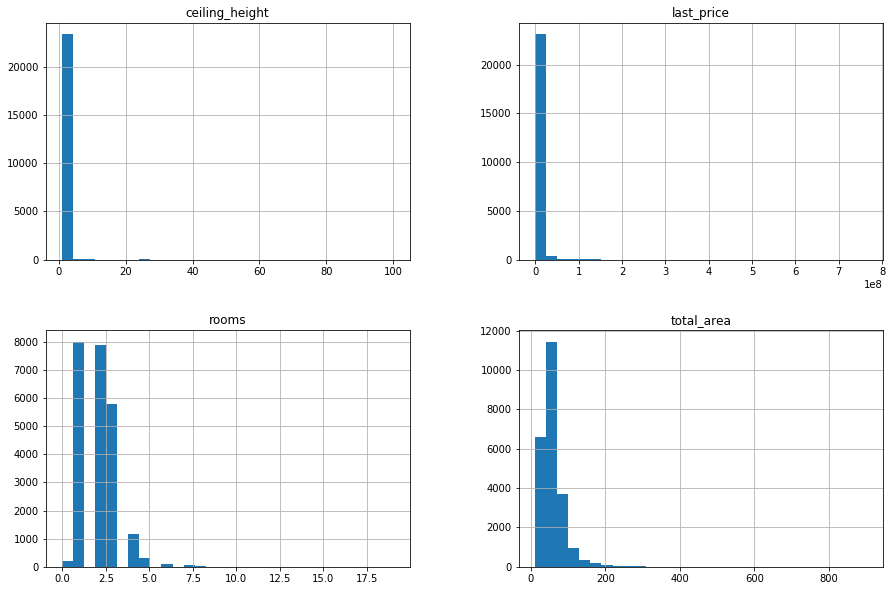

In [185]:
# Построим гистограммы распределения переменных
typical_parms.hist(figsize=(15,10), bins=30);

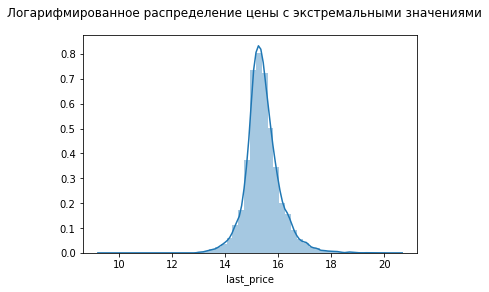

In [186]:
# Логарифмируем распределение цены по всей выборки с экстремальными значениями. Посмотрим на распределение
sns.distplot(np.log(typical_parms.last_price))
plt.suptitle('Логарифмированное распределение цены с экстремальными значениями');

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> 

Пропало название графика :)
</div>

    Итак, гистограммы распределения слабо читаемые из-за выбивающихся (к минимуму и максимуму) экстремально высоких и низких значений.
    Так, значения цены колеблется от 12 до более 700 млн., в то время как высота потолков достигает 100 м., а количество комнат варьируется от 0 до 19. Тоже самое касется площади -  квартиры достигают площади в 900 кв м. Экстремальные скачкив исследуемых характеристиках наблюдаются за 75% процентилем -т.е. количество таких квартир крайне не велико. Полагаем, что некоторые квартиры явлются коммерческими помещениями, выставленными на продажу. То, как выглядили бы распределения, если бы мы не очистили выборку от выбросов в рамках исследуемых признаков, можно наблюдать на графиках логарифмированных значений - такие распределения сильно искажают реальные результаты исследования.

    Графики скошены влево, что снижает их их интрпретативную составляющую. Обратимся к построению boxplot переменных для того, чтобы определетить границы межквартильных размахов, "взвесить" и удалить выбросы.

    Начнем с описательной статистики "Цены" за квартиру. Построим диаграмму размаха величины, определим границу статистических выбросов, посмотрим на распределение выбросов и посмотрим на распределение величины без экстремальных значений.

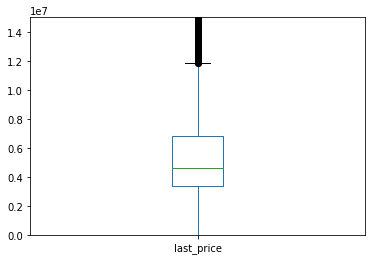

In [187]:
# Построим boxplot для значений цены за кв., ограничив значения последней в 15 млн. руб. - числа, примерно в 2 раза 
# превышающего 75-й процентиль - для удобства интерпретации визуализации
typical_parms.plot(kind='box', y='last_price', ylim=(0, 15000000))
plt.show()

        Итак, мы наблюдаем 1) смещение выборки влево - медианные значения не совпадают со средним, 2) наличие статистически значимых выбросов на границе, примерно в 12 млн. руб. 

In [55]:
# Определим верхнюю границу 1.5 межквартильного размаха для того, чтобы обозначить границу, после которой мы можем 
# маркировать значения выбросами. Эта граница составляет 11.875 млн. руб.
typical_parms['last_price'].describe()['75%'] + 1.5*(typical_parms['last_price'].describe()['75%']-typical_parms['last_price'].describe()['25%'])

11875000.0

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> 

Длинные строчки кода лучше переносить :)
</div>

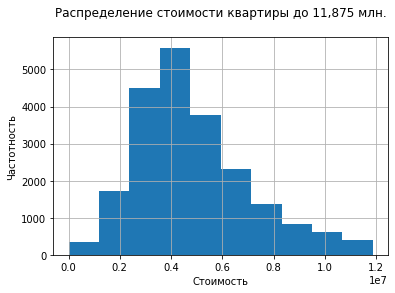

In [189]:
# Снова построим гистограмму распределения стоимости квартир в пределах до 1.5 IQR, т.е. без статистически значимых выбросов.
typical_parms['last_price'].hist(range=(0, 11875000.0))

plt.title('Распределение стоимости квартиры до 11,875 млн.'+ "\n")
plt.xlabel('Стоимость')
plt.ylabel('Частотность')
ax.locator_params(integer=True)
plt.show()

        Итак, из графика видно, что результатом фильтрации от статистических выбросов стало, в целом, гомогенное и близкое к симметричному унимодальное распределение со средним рыночным значением цены в райне 4.5 млн. руб. В ценовом сегменте выше квартир представлено градиентно меньше.

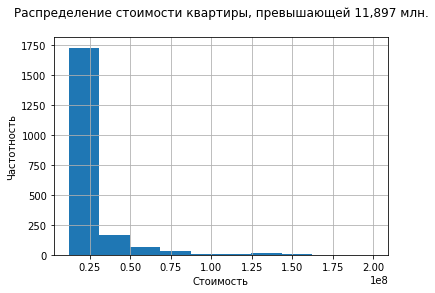

In [190]:
# Выведем распределение кв., стоимость которых превышает границу доверительного интервала (для унаглядности установим верхнюю границу цены 
# в 1/4 от максимального значения)
typical_parms['last_price'].hist(range=(11897500.0, 200000000))

plt.title('Распределение стоимости квартиры, превышающей 11,897 млн.'+ "\n")
plt.xlabel('Стоимость')
plt.ylabel('Частотность')

plt.show()

In [58]:
# Посчитаем долю квартир от отфильтрованной выборки, которые составляют выбросы по стоимости жилья
dolya_extr_ceny = len(df_filtered.query('last_price > 11897500')) / len(df_filtered)
print('Доля выбросов стоимости жилья от всей выборки составляет: {:.2%}'.format(dolya_extr_ceny))

Доля выбросов стоимости жилья от всей выборки составляет: 8.67%


In [59]:
# Любопытно, что в диапозоне более 200 млн. руб. представлено всего лишь 37 кв. это около 0.17 % от общего количества кв.
len(df_filtered.query('last_price > 100000000'))

37

        Исследуем "Высоту потолков" продаваемых квартир. Построим диаграмму размаха величины, определим границу статистических выбросов, посмотрим на распределение выбросов и посмотрим на распределение величины без экстремальных значений.

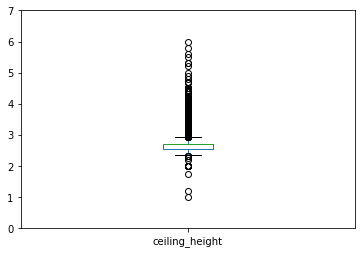

In [191]:
# Построим boxplot для высоты потолков, предварительно ограничив диапозон 7 м.
typical_parms.plot(kind='box', y='ceiling_height', ylim=(0, 7))

plt.show()

In [61]:
# Определим верхнюю и нижнюю границу высоты потолков до выбросов
upper_height = typical_parms['ceiling_height'].describe()['75%'] + 1.5*(typical_parms['ceiling_height'].describe()['75%']-typical_parms['ceiling_height'].describe()['25%'])
lower_height = typical_parms['ceiling_height'].describe()['25%'] - 1.5*(typical_parms['ceiling_height'].describe()['75%']-typical_parms['ceiling_height'].describe()['25%'])
print('Нижняя граница высоты потолков до выбросов: {:.4}'.format(lower_height))
print('Верхняя граница высоты потолков до выбросов: {:.4}'.format(upper_height))

Нижняя граница высоты потолков до выбросов: 2.325
Верхняя граница высоты потолков до выбросов: 2.925


In [62]:
# Посчитаем количество квартир в сумме до выбросов и их долю от выборки
h_up_len = len(df_filtered.query('ceiling_height > 2.925'))
h_down_len = len(df_filtered.query('ceiling_height < 2.325'))
dolya_ceiling_height = (h_up_len + h_down_len) / len(df_filtered)
print('Доля кв с статистическими выбросами в высоте потолков составляет: {:.2%}'.format(dolya_ceiling_height))

Доля кв с статистическими выбросами в высоте потолков составляет: 11.63%


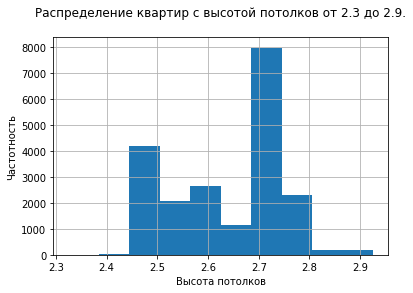

In [192]:
# Посмотрим на распределение высоты потолков после удаления выбросов
typical_parms['ceiling_height'].hist(range=(2.325, 2.925))

plt.title('Распределение квартир с высотой потолков от 2.3 до 2.9.'+ "\n")
plt.xlabel('Высота потолков')
plt.ylabel('Частотность')

plt.show()

In [64]:
df_filtered

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,coeff_liv_area,coeff_kitch_area,cost_per_metr,weekday,month,year,living_to_total,kitchen_to_total,floor_category
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,183.00,0.63,0.24,120370,3,3,2019,0.47,0.23,другой
1,7,3350000,40.40,2018-12-04,1,2.62,11,18.60,1,False,...,81.00,0.49,0.55,82921,1,12,2018,0.46,0.27,первый
2,10,5196000,56.00,2015-08-20,2,2.70,5,34.30,4,False,...,558.00,0.58,0.32,92786,3,8,2015,0.61,0.15,другой
3,0,64900000,159.00,2015-07-24,3,2.70,14,99.50,9,False,...,424.00,0.63,0.24,408176,4,7,2015,0.63,0.15,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,121.00,0.58,0.32,100000,1,6,2018,0.32,0.41,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23560,9,9700000,133.80,2017-03-21,3,3.70,5,73.30,3,False,...,183.00,0.63,0.24,72496,1,3,2017,0.55,0.10,другой
23561,14,3100000,59.00,2018-01-15,3,2.50,5,38.00,4,False,...,45.00,0.63,0.24,52542,0,1,2018,0.64,0.14,другой
23562,18,2500000,56.70,2018-02-11,2,nan,3,29.70,1,False,...,99.00,0.58,0.32,44092,6,2,2018,0.52,0.17,первый
23563,13,11475000,76.80,2017-03-28,2,3.00,17,44.50,12,False,...,602.00,0.58,0.32,149414,1,3,2017,0.58,0.30,другой


        Итак, после удаления необычно низких и экстремально высоких значений в высоте потолков (2740 кв. из них 2720 кв - со значением выше верхней границы) мы получаем не равномерно распределенный, но более читаемый и интерпретируемый график распределения значений по 20825 кв. Применяя конкретные значения переменной можно строить статистически достоверные выводы о влиянии фактора высоты потолков на стоимость жилья. На графике распределения мы наблюдаем две скачка от 2.45 до 2.5 м., и 2.7 до 2.75 м.

Обратимся к распределению общей площади продаваемых квартир.

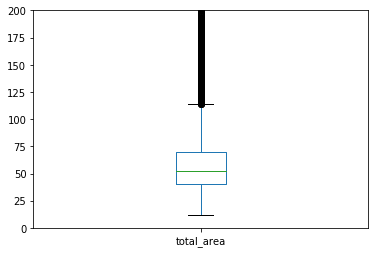

In [193]:
# Построим boxplot для распределения величины "общая площадь", предварительно ограничив вернхнюю границу в 200 кв.м., 
# что примерно 3 раза превышает 75-й процентиль и в 4 раза меньше максимального значения
typical_parms.plot(kind='box', y='total_area', ylim=(0, 200))

plt.show()

In [194]:
# Определим верхнюю границу значения, за пределами которой мы статистически достоверно можем утверждать о выбросах: 114.25 кв.м.
typical_parms['total_area'].describe()['75%'] + 1.5*(typical_parms['total_area'].describe()['75%']-typical_parms['total_area'].describe()['25%'])

114.25

In [195]:
# Посчитаем количество квартир, превышающих верхнюю границу 1.5 межквартильных размаха: 1239 кв. (что составляет чуть более 5% выборки)
len(df_filtered.query('total_area > 114.25')) / len(df_filtered)

0.05257797581158498

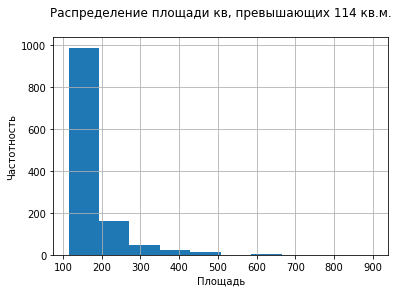

In [196]:
# Посмотрим на плотность распределения площадей кв.-выбросов.
typical_parms['total_area'].hist(range=(114.5, df_filtered['total_area'].max()))

plt.title('Распределение площади кв, превышающих 114 кв.м.'+ "\n")
plt.xlabel('Площадь')
plt.ylabel('Частотность')

plt.show()

    Мы наблюдаем, что в значениях выбросов кв с площадью после 200 кв.м резко падают в количестве до единиц, что напоминает экспоненциальное снижение.

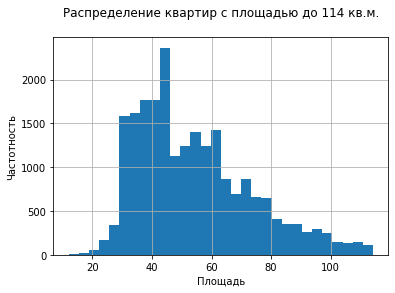

In [197]:
# Построим гистограмму распределения общей площади квартир в границах до выбросов.
typical_parms['total_area'].hist(bins=30, range=(df_filtered['total_area'].min(), 114.25))

plt.title('Распределение квартир с площадью до 114 кв.м.'+ "\n")
plt.xlabel('Площадь')
plt.ylabel('Частотность')

plt.show()

         На графике мы наблюдаем сглаженное распределение площади квартир с пиком в райне 45 кв.м. и существенной долей кв площадью в диапазоне от 24 до 42 кв.м. Гепотетически существенную долю квартир малой площади, также, как и самых больших составляют те, что продаются в Санкт-Петербурге - в этом городе довольно много продающихся в коммунальных квартирах комнат, реновированных под квартиры в виде студий, площадь которых едва достигает 25 кв.м. В то же время, квартиры с жилой площадью более 100 кв.м. - могут быть следствием увеличения площади жилья за счет мансард, террас либо же могут быть расположены в расселенных квартирах дореволюционного фонда с большими корридорами и комнатами. 

Прибегнем к анализу распредения продаваемых квартир в срезе числа комнат.

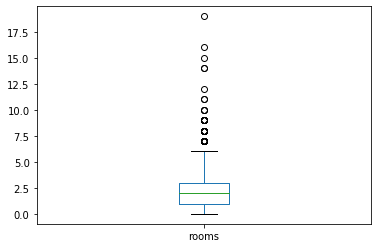

In [198]:
# Построим boxplot для переменной: на графике видно небольшое количество выбивающихся значений за пределами в райне 6 комнат. 
typical_parms.plot(kind='box', y='rooms')

plt.show()

In [199]:
# Определим верхнюю границу 1.5 межквартильных размаха: 6 комнат. Медианное и среднее значение комнат при этом примерно совпадает - в районе 2 комнат.
typical_parms['rooms'].describe()['75%'] + 1.5*(typical_parms['rooms'].describe()['75%']-typical_parms['rooms'].describe()['25%'])


6.0

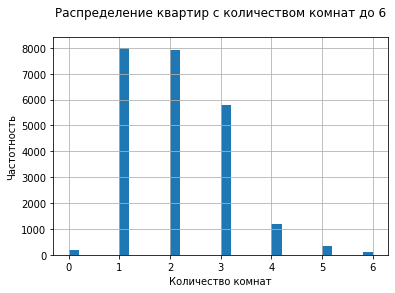

In [200]:
# Построим график распределения количества комнат до выбросов 
typical_parms['rooms'].hist(bins=30, range=(0, 6))

plt.title('Распределение квартир с количеством комнат до 6'+ "\n")
plt.xlabel('Количество комнат')
plt.ylabel('Частотность')

plt.show()

In [201]:
# Посчитаем количество квартир, превышающих верхнюю границу 1.5 межквартильных размаха, т.е 6 комнат: 90 кв. (что составляет 0.4% выборки)
len(df_filtered.query('rooms > 6')) / len(df_filtered)

0.0038192234245703373

In [202]:
len(df_filtered.query('rooms > 6'))

90

    Распределение квартир с исключенными выбросами выглядит интерпретативным и достоверным. Минимальное количество квартир с 0 комнат, что скорее всего является студиями или реновированными под студии коммунальными комнатами (если говорить о г. Санкт-Петербург). Количество 1-х и 2-х кв. примерно одинаковое, далее количество квартир с большим количеством комнат становится меньше.

    Приступим к анализу сроков размещения объявления. Прежде следует отметить, что исходя из данных, как уже было сказано в предыдущем разделе, мы не можем однозначно утверждать о том, что переменная days_exposition - свидетельствует о сроке, в рамках которого продавец реализовал недвижимость. Экстремально высокие - более 1.5 тысяч дней (это более 4 лет) и чрезвычайно низкие показатели - от 1 до 20 дней сроков размещения объявления могут свидетельствовать о том, что продавец зне снял объявление с публикации, передумав продавать жилье, либо передумал продавать и снял. Так или иначе, работа с экстремальными значениями, выбросами, данной переменной, поможет верифицировать значения категории в качестве "срока продаж" (в рамках остальных значений переменной мы допускаем то, что продажа квартир может длиться от 7 месяца до 1 года - несмотря на то, что эти показатели также довольно велики.

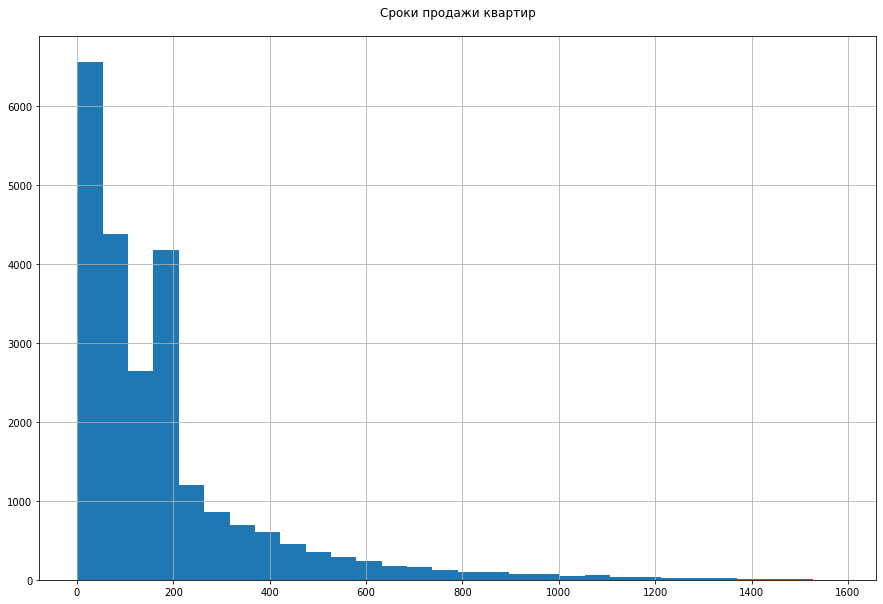

In [203]:
# Посмотрим на распределения сроков публикации объявлений 
df_filtered['days_exposition'].hist(figsize=(15,10), bins=30)
plt.title('Сроки продажи квартир', pad=20)
plt.show()

In [204]:
df_filtered['days_exposition'].describe()

count   23,485.00
mean       180.93
std        205.24
min          1.00
25%         45.00
50%        120.00
75%        209.00
max      1,580.00
Name: days_exposition, dtype: float64

        График распределения демонстрирует два пика: от 0 до 45-50 дней и 150 до 200 дней. Далее количество дней резко и перманентно убывает, оставляя длинный хвост в значениях распределения, количество которых стремится к 0. Медианное значение переменной при этом 120 дней (4 месяця), среднее - 180 (6 месяцев) - это свидетельствует также о чрезвычайно низком количестве объявлений с бОльшим количеством дней размещения.

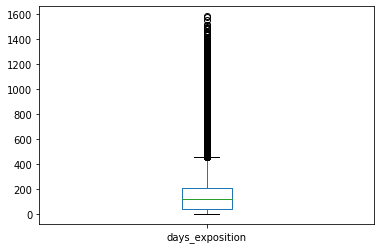

In [205]:
# Построим boxplot величины, из которого видно большое количество выбросов за пределами границы (1.5 IQR) в районе от 400 до 500 дней.
df_filtered.plot(kind='box', y='days_exposition')

plt.show()

In [206]:
# Определим верхнюю границу полуторного межквартильного размаха: 455 дней (1 год 2 месяца)
df_filtered['days_exposition'].describe()['75%'] + 1.5*(df_filtered['days_exposition'].describe()['75%']-df_filtered['days_exposition'].describe()['25%'])

455.0

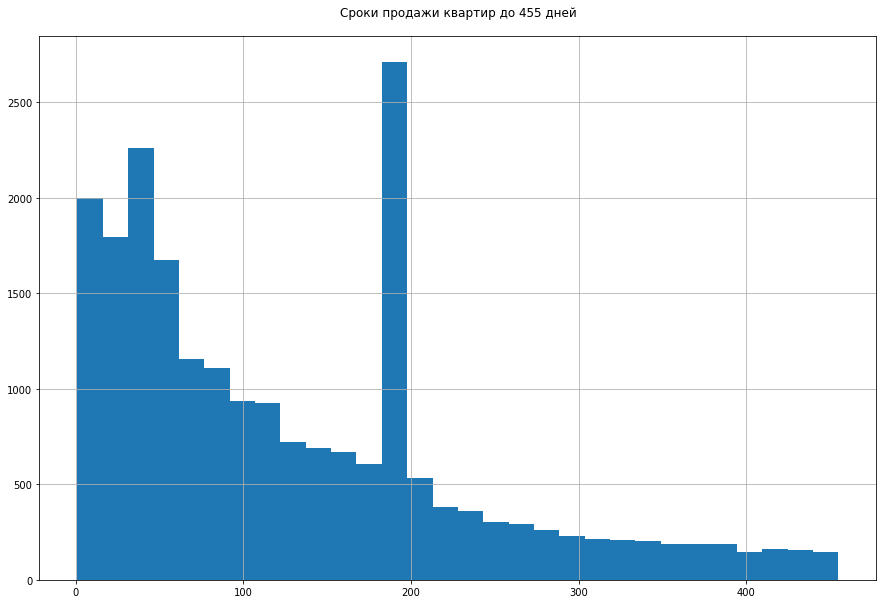

In [207]:
# Посмотрим график распределения значений до выбросов
df_filtered['days_exposition'].hist(figsize=(15,10), bins=30, range=(1, 455))
plt.title('Сроки продажи квартир до 455 дней', pad=20)
plt.show()

In [208]:
good_days_exposition = df_filtered.query('days_exposition <= 455')
good_days_exposition['days_exposition'].describe()

count   21,419.00
mean       129.53
std        105.27
min          1.00
25%         45.00
50%        103.00
75%        183.00
max        455.00
Name: days_exposition, dtype: float64

        На графики распределения до выбросов мы также наблюдаем два пика значений: от 40 до 50 дней и от 180 до 190). При этом второй временной пик самый представленный, в то время как не меняет общий тренд снижения количества дней о продаже объявлени. Средним количеством дней в такой выборке будет примерно 130. 

        Наиболее примечательным свойством этого распределения является то, что статистически мы не можем считать значения от 1 до 45 дней - выбросами, ввиду того, что они довольно емко представлены в выборке. Между тем, теоретически, объявления, которые были размещены до 14 дней - вряд ли закончились сделкой (при этом релевантной границы в количестве дней обнаружить нельзя).

Text(0.5, 1.0, 'Сроки продажи квартир до 45 дней')

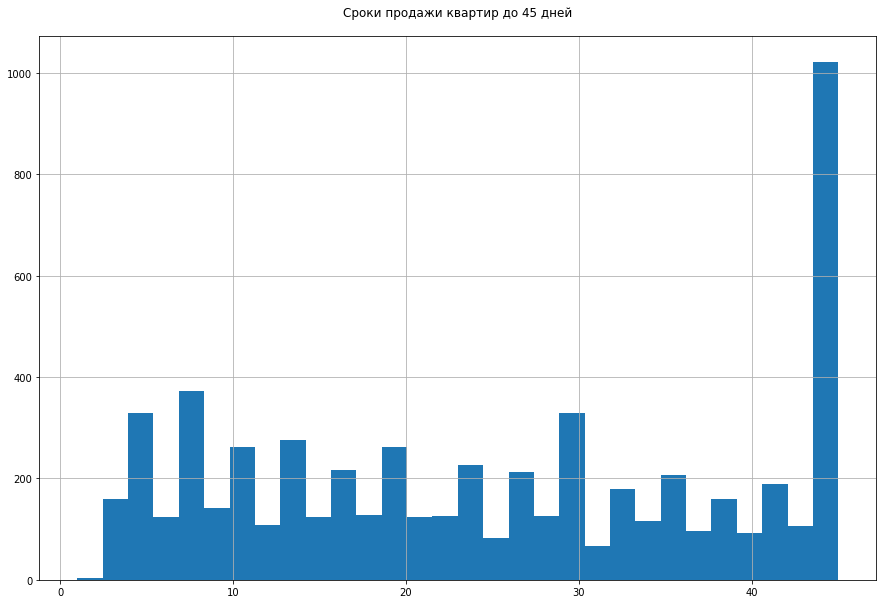

In [209]:
# Построим график распределения количества дней от 1 до 25-го квантиля 
df_filtered['days_exposition'].hist(figsize=(15,10), bins=30, range=(1, 45))
plt.title('Сроки продажи квартир до 45 дней', pad=20)

In [210]:
# Проверим количество объявлений до 45 дней размещения: более 5 тысяч. Таким образом, оставляем все объявления о сдаче квартиры до 1 дня.
len(df_filtered.query('days_exposition < 45'))

5079

    Итак, соберем подготовленный финальный датасет к анализу, отфильтрованный от выбросов и построим матрицу графиков совместного распределения. В финальной отфильтрованной таблице 17874 квартир.

In [211]:
good_data = df_filtered.query('last_price <= 11875000 & rooms <= 6 & ceiling_height <= 2.925 & ceiling_height >= 2.325 & total_area <= 114.25 & days_exposition <= 455')
len(good_data)


17874

    Визуализируем количественные характеристики переменных, включая исследуемые, по отфильтрованной от выбросов выборке

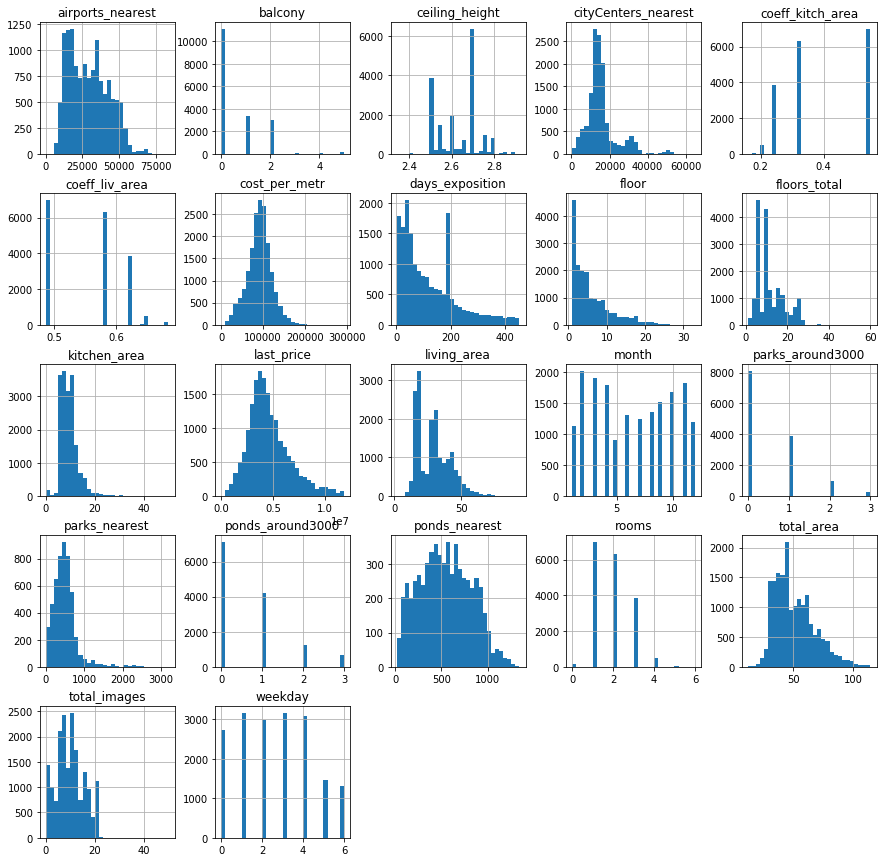

In [212]:
ax = good_data.select_dtypes(include=np.number).iloc[:, :22].hist(figsize=(15,15), bins=30)

plt.show()

In [213]:
# Посмотрим на описательюную статистику отфильтрованной от выбросов таблицы
good_data[['total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height', 'last_price']].describe()

,total_area,living_area,kitchen_area,rooms,ceiling_height,last_price
count,"17,874.00","17,874.00","17,874.00","17,874.00","17,874.00","17,874.00"
mean,51.18,29.18,9.35,1.87,2.63,"4,632,631.80"
std,16.83,12.03,3.59,0.87,0.10,"2,039,830.82"
min,12.00,2.00,0.00,0.00,2.34,"12,190.00"
25%,38.00,18.00,7.00,1.00,2.55,"3,270,000.00"
50%,47.00,28.20,9.00,2.00,2.65,"4,280,000.00"
75%,61.30,37.50,11.00,2.00,2.70,"5,650,000.00"
max,114.20,93.60,50.00,6.00,2.92,"11,866,860.00"


        Итак, отфильтрованные нами данные выглядят равномерно и интерпретативно. Значения цены варьируется до около 12 млн. руб. со средним значенияем в 4.6 млн. руб., стандартная ошибка в высоте потолков 0.1 (чрезвычайно низкая) со средним в 2.6 и сохранением в данных значений до, в среднем, высоких (2.92) - что характерно для Санкт-Петербурга. Количество комнат варьируется от 1 до 6, а общая жилая площадь в среднем составляет 50 кв.м. График распределения цены стал близок нормальному распределению - он унимодальный, почти симметричный, немного скошенный влево. График цены за кв.м. также стал напоминать график нормального распределения. 

### Вывод

        Технический вывод
        В результате построения графиков распределения количественных величин - ключевых для анализа характеристик квартир - мы получили выборку в 17874 квартиры. Мы провели анализ распределения и фильтрацию статистических выбросов по следующим переменным: стоимость квартиры, общая площадь, высота потолков, количество комнат и количестве дней размещения объявления о продаже.
        В изначальном датасете исследуемые характеристики квартир были распределены крайне не равномерно, графики распределения были скошены влево и трудно интерпретируемые, что свидетельствовало о наличии в данных экстремально высоких и низких значений. Примечательно, что в некоторых случаях доля выбросов была настолько низкая относительно выборки, что среднее и медианное значение переменной фактически совпадали.
        Графики гдиаграммы размаха (boxplot) запротоколировали наличие статистически значимых выбросов во всех исследуемых переменных. Взвесив долю выбросов и посмотрев на их распределение, было принято решение удалить их из выборки.
        В данном анализе, в процессе принятия решения об избавления от экстремальных значений мы не проверяли, каким образом удаление выбросов скажется на распределение цены, но основывались исключительно на данных "ящика с усами" и данных о распределении и доли выбросов. Такое решение было принято ввиду того, что сами значения цены выглядели чрезвычайно гетерогенными - максимальная цена за квартиру превышала 700 млн. руб. Таким образом, сама переменная цена была подвержена чистке от выбросов. 
        Аналитический вывод
        В рамках анализа количество квартир, стоимость которых превышала 200 млн, в то время как площадь составляла более 200 кв.м. - десятки и единицы. Это позволило предположить, что в общих объявлениях о продаже квартир присутствуют объявления о продаже коммерческой недвижимости (примечательно, что некоторые индексы отношения жилой к общей площади ничтожно малы, в то время как площадь кухни отсутствовала, но в данных не было отмечено то, что помещение является студией). Такие объявления в 900 кв.м. общей площади и высотой потолков в 100 м. чрезвычайным образом лишали данные интерпретативных возможностей. Не менее примечательны здесь и объявления о продаже квартир стоимостью в 12 тысяч рублей и 12 кв.м., которые являются либо следствием ошибки ввода данных - продаются студии в 1.2 млн рублей, либо также являются объявлением об аренде квартиры, но не о продаже, и по ошибке попали в данные.
        Не менее примечательным является и параметр количества дней размещения объявления. С одной стороны, в данных есть только 1 случай с количеством дней размещения объявления в 1 день - срок, который сложно интерпретировать в качестве показателя скорости реализации недвижимости. С другой, в данных несколько тысяч объявлений до 45 дней - 25 процентиля данных, в то время как количество объявлений с рекордно низкими показателеями дней размещения до 45 дней растут экспоненциально. Такие объявления мы были вынуждены оставить в выборке, тем более, ввиду того, что они не выходили за границу 1.5 межквантильного размаха переменной. 

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> 

Эта часть сделана просто шикарно! Особенно круто, что разделил статистические и бизнесовые выводы. Такое редко встретишь :) Браво!
</div>

#### Исследование факторов, влияющих на стоимость квартиры

    В этом разделе мы изучим, каким образом ключевые характеристики квартир влияют на их стоимость? Здесь мы исследуем влияние площади, числа комнат, удаленности от центра на стоимость квартиры. А также исследуем влияние косвенных факторов на ценообразование: этаж квартиры, даты размещения объявления.

In [214]:
# Посчитаем коэффициенты корреляции Пирсона для исследования взаимосвязи переменных попарно со стоимостью квартир
good_data.corr()['last_price'].sort_values(ascending=False)

last_price             1.00
total_area             0.68
cost_per_metr          0.62
living_area            0.55
kitchen_area           0.47
rooms                  0.42
coeff_liv_area         0.39
ceiling_height         0.35
floors_total           0.28
floor                  0.19
total_images           0.18
balcony                0.10
ponds_around3000       0.10
parks_nearest          0.08
parks_around3000       0.05
year                   0.04
days_exposition        0.03
living_to_total        0.01
month                  0.01
airports_nearest      -0.01
weekday               -0.01
ponds_nearest         -0.03
open_plan             -0.05
studio                -0.07
kitchen_to_total      -0.11
cityCenters_nearest   -0.30
coeff_kitch_area      -0.41
Name: last_price, dtype: float64

        Ожидаемо, что первую тройку наиболее высоких коэффицентов корреляцию составляют "Общая площадь", "Жилая площадь" и почти 0.5 "Площадь кухни". Здесь же примечательно, что одним из ярко выраженных коэффицентов является связь цены за кв.м и стоимости жилья (мультиколлениарность в данном случае указывает на рыночною фундированности цены квартир). Чуть слабже цену квартиры определяют количество комнат и высота потолков. Еще менее выражена, но все еще статистически значима связь между общим количеством этажей и цены. В то время как этаж квартиры с ценой связан, контр-интуитивно, довольно слабо. Из отрицательной сильной связи, предсказуемо значим критерий близости к центру. 
        Здесь следует ответить, что коэффициент корреляции Пирсона не может свидетельствовать о наличии или отсутствии связи между переменным, однако, позволяет делать вывод, насколько сильно изменение одной переменной влияет на изменение другой. Более того, коэффициент корреляции проверяет линейность связи - к нелинейной взаимосвязи он не специфичен. Посмотрим детально на характер связи между площадью, числом комнат, удаленностью от центра и стоимостью продаваемых квартир.

In [215]:
# Для начала составим и визуализируем корреляционную матрицу переменных
sample_corr = good_data[['total_area', 'living_area', 'kitchen_area', 'cityCenters_nearest', 'floors_total', 'floor', 'ceiling_height', 'rooms', 'last_price']]

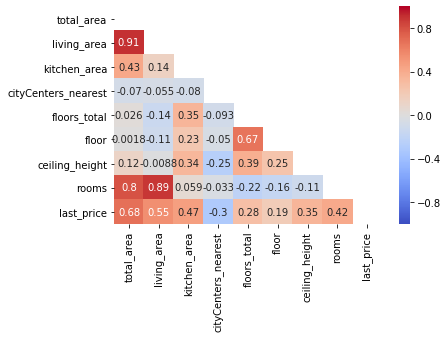

In [216]:
matrix = np.triu(sample_corr.corr())
sns.heatmap(sample_corr.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=matrix);

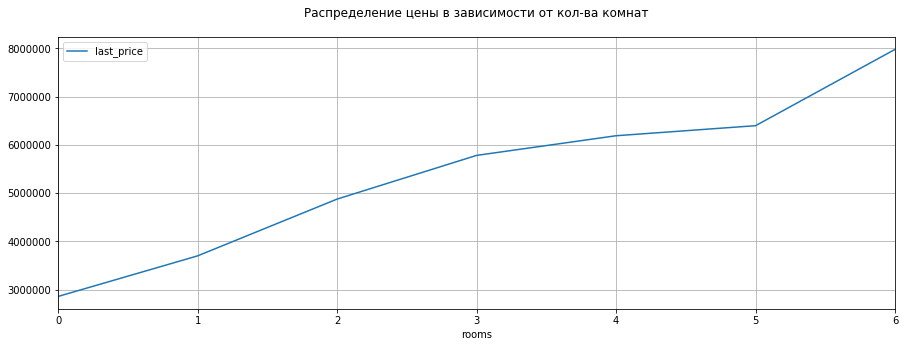

In [217]:
# Построим график распределения цены в зависимости от количества комнат
pivot_rooms = good_data.pivot_table(index='rooms', values='last_price').plot(grid=True, figsize=(15, 5))
plt.title("Распределение цены в зависимости от кол-ва комнат", pad=20);

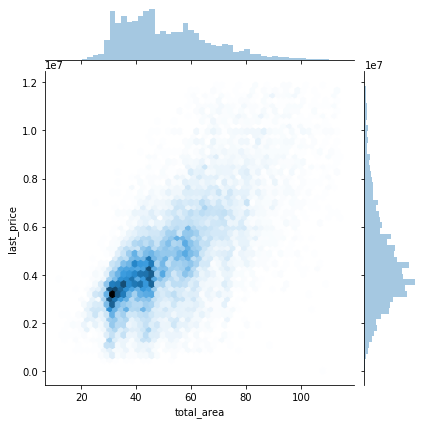

In [218]:
# Построим график совместного распределения общей площади и цены за квартиру
sns.jointplot(x='total_area', y='last_price', data=good_data, kind='hex');


Это график совместного распределения цены и площади квартиры - он показывает , с какой площадью квартир в каком ценовом диапазоне больше, в каком - меньше. По нему можно наглядно обнаружить первичную зависимость

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> 

Что-то интересное. Для таких графиков лучше делать некое описание. 
</div>

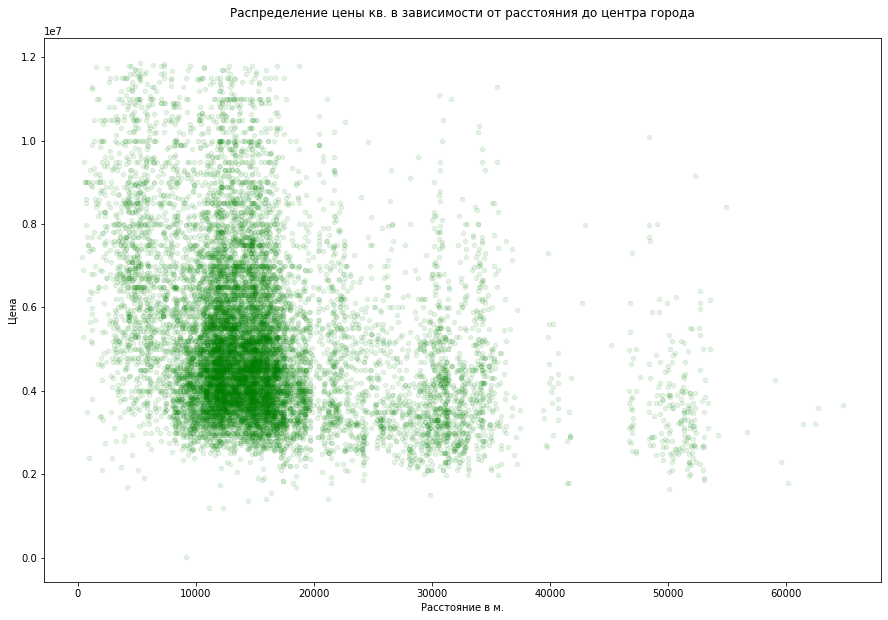

In [219]:
# Построим график распределения цены в зависимости от удаленности от центра города
good_data.plot(x='cityCenters_nearest', y='last_price', kind='scatter', figsize=(15, 10), alpha=0.1, c='g')

plt.title('Распределение цены кв. в зависимости от расстояния до центра города'+ "\n")
plt.xlabel('Расстояние в м.')
plt.ylabel('Цена')

plt.show()

Посмотрим на распределение цены в зависимости от того, на каком этаже располагается квартира и от того, в какой день недели, месяц, год было размещено объявление о продаже 

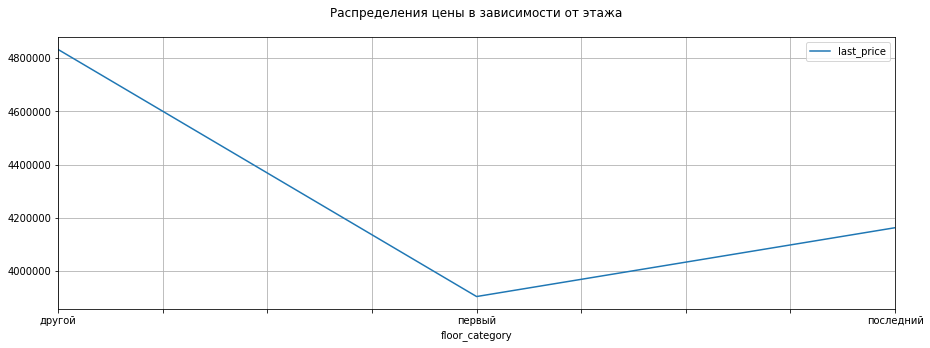

In [221]:
# Построим график зависимости стоимости жилья от того, на каком этаже расположена квартира (первом, последнем, другом)
ax = good_data.pivot_table(index='floor_category', values='last_price').plot(grid=True, figsize=(15, 5))
ax.set_title("Распределения цены в зависимости от этажа", pad = 20);

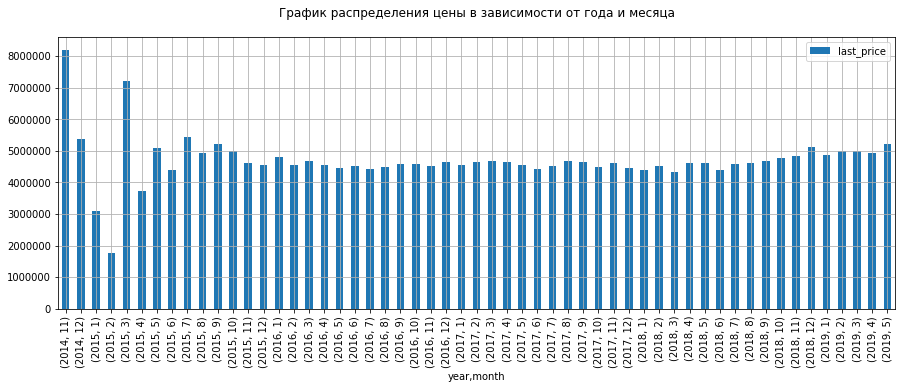

In [222]:
# Построим график распределения стоимости квартиры в зависимости от года и месяца размещения объявления
ax = good_data.groupby(['year', 'month']).agg({'last_price': 'mean'}).plot(kind='bar', grid=True, figsize=(15, 5))
ax.set_title("График распределения цены в зависимости от года и месяца", pad = 20);

In [223]:
# Из сводной таблицы видно, что день недели размещения объявления едва ли влияет на стоимость жилья - это интнуитивно понятно, 
# ведь квартира является долгосрочным активом, стоимость которого определяют фундаментальные факторы: физические, топологические характеристики кв.
# социально-экономическая, политическая ситуация страны, региона, города.
good_data.groupby('weekday').agg({'last_price': 'mean'})

,last_price
weekday,
0,"4,641,486.76"
1,"4,668,533.81"
2,"4,645,901.57"
3,"4,612,992.14"
4,"4,643,926.06"
5,"4,557,527.52"
6,"4,603,306.19"


    Отберем топ-10 городов с самым большим количеством объявлений о продаже квартир, посчитаем в них среднюю цену квадратного метра, а после выделим город с самым высокой высокой и самой низкой ценой

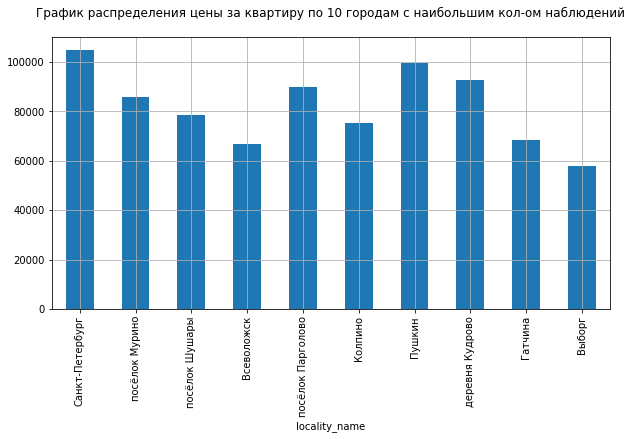

In [224]:
top_towns = good_data.groupby('locality_name')['cost_per_metr'] \
.agg(['count', 'mean']).sort_values(by='count', ascending=False).head(10) \

ax = top_towns['mean'].plot(grid=True, figsize=(10,5), kind='bar')
ax.set_title("График распределения цены за квартиру по 10 городам с наибольшим кол-ом наблюдений", pad = 20);


### Вывод
    Итак, исходя из анализа графиков взавимосвязи ключевых характеристик квартир и ценообразования мы можем сделать следующие выводы.
        С ростом количества комнат (до 6) стоимость квартиры перманентно увеличивается. Наиболее драматичный рост цен наблюдается за квартирыот 1 до 3 комнат и от 5 до 6. От студий или квартир с свободной планировкой с о комнат до 1-х квартир и с 3-х до 5-х цена растет плавнее.
        С ростом общей площади квартиры растет и цена, причем, чем выше площадь, тем цена растет интенсивнее. В диапазоне квартир площадью от 60 до 80 кв.м. цена квартир сильно блазирована и связь менее очевидна. В диапазоне от 25 до 45 кв.м. связь с ростом цены более представлена (от 3 до 5 млн.). 
        Что касается определения взаимосвязи между расстоянием до центра в метрах и стоимостью квартир - построить такой затруднительно без предварительной агрегации дистанции (например, в км.) по десяткам тысяч наблюдений. Скатерплот позволяет сделать предварительные выводы о характере связи. График разбивается на 4 кластера данных - от 0 до 5 км., от 10 до 20 км. от 25 до 35 км. и от 50 до 60 км. В первом диапазоне цены распределены более менее равномерно от 4 до 12 млн. руб., во втором - львинная доля данный сконцентрирована от 2.5 до 6.5. млн. руб., в третьем - от 2 до 4 млн. (при этом почти не встречаются высокие ценовые значения) и в четвертом - в районе 3 млн (совсем не встречаются высокие цены за кв. 
        Этаж квартиры определяет цену, предсказуемо, следующим образом - самые высокие цены у квартир, расположенных ни на первом, ни на последнем этажах. Самые низкие цены у квартир, расположнных на первом этаже, чуть выше цен у квартир, расположенных на последнем этаже.
        Не менее примечателен график распределения цен в зависимости от месяца и года подачи объявления. В целом, по выборке наблюдается драматическое падения цен за квартиры с конца 2014 года (в данных за 2014 год есть информация лишь о двух последних месяцев) по февраль 2015 года. Далее график выравнивается, но уже не достигает своих ценовых значений за 2014 год ни в одном из последующих годов. В целом, из года в год по графику можно наблюдать медленный но планамерный рост цен по сезонам, в целом. Сезоны - месяцы - определяют на графике месяца, в которых было подано объявление. Чрезвычайно сильное падение цен может быть обусловлена социально-экономическим кризисом, девальвацией рубля на фоне международных санкций, падения цен на нефть и эскалации военно-политического конвликта на Востоке Украины (об этом мы подробнее остановились в последнем разделе). В целом, сентябрь/октябрь - декабрь - отражает сезонный рост цен на квартиры, в то время как нименьшие цены наблюдаются летом (по Санкт-Петербургу ситуация обратное - см. в последнем разделе). День недели подачи объявления едва ли определяет цену стоимости квартиры, что видно из распределении цен в срезе выведенной сгруппированной таблицы.

        В срезе всей отфильтрованной выборки, городами с наибольшим количеством объявлением квартир являются: Санкт-Петербург и близлежащие города Ленинградской обл. : пос. Мурино (м. Девяткино), пос. Шушары, пос. Всеволожск, пос. Парголово, пос. Колпино., Пушкин., деревня Кудрово, Гатчина, Выборг - входящие в городскую агломерации города Санкт-Петербург. Самая высокая средняя цена за кв - в Санкт-Петербурге, самая низкая - в Выборге - он фактически расположен дальше всех остальных из топ-10 от Санкт-Петербурга. 


#### Исследования сегмента квартир в центре

    Обратимся к исследованию ценообразования квартир в г. Санкт-Петербург.
    Для того, чтобы сравнить распределение ключевых характеристик квартир в центре г. Санкт-Петербург и районах, выходящих за пределы центра, в первую очередь, математически определим центральный округ. Затем сделаем срез данных по этому округу, посмотрим на зависимости центральной подвыборки и сравним с общими тенденциями по всему городу. 

In [225]:
# Сохраним срез данных без пропущенных значений в переменной расстояния до центра города.
df_spb = good_data.query('cityCenters_nearest != "NaN" & locality_name == "Санкт-Петербург"').copy()
# Проверим, сколько квартир осталось в выборке: 11193 кв по Санкт-Петербургу
len(df_spb)

11193

In [226]:
df_spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,coeff_liv_area,coeff_kitch_area,cost_per_metr,weekday,month,year,living_to_total,kitchen_to_total,floor_category
7,5,7915000,71.60,2019-04-18,2,2.70,24,41.50,22,False,...,183.00,0.58,0.32,110545,3,4,2019,0.58,0.26,другой
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,289.00,0.63,0.24,88525,6,2,2017,0.71,0.11,другой
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,False,...,137.00,0.49,0.55,127525,3,11,2017,0.51,0.21,другой
15,16,4650000,39.00,2017-11-18,1,2.70,14,20.50,5,False,...,19.00,0.49,0.55,119231,5,11,2017,0.53,0.19,другой
18,8,3250000,31.00,2017-01-27,1,2.50,5,19.40,2,False,...,168.00,0.49,0.55,104839,4,1,2017,0.63,0.18,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23547,13,5250000,43.00,2018-05-11,2,2.50,5,29.00,2,False,...,80.00,0.58,0.32,122093,4,5,2018,0.67,0.14,другой
23552,8,3300000,31.00,2017-04-29,1,2.55,9,18.00,6,False,...,193.00,0.49,0.55,106452,5,4,2017,0.58,0.21,другой
23553,6,3200000,39.00,2017-12-16,1,2.70,9,20.00,6,False,...,38.00,0.49,0.55,82051,5,12,2017,0.51,0.28,другой
23555,13,3550000,35.30,2018-02-28,1,2.86,15,16.30,4,False,...,29.00,0.49,0.55,100567,2,2,2018,0.46,0.26,другой


In [227]:
# Создадим в датафрейме по Санкт-Петербургу новый столбец с километражом расстояния до центра города.
df_spb['c_km'] = df_spb['cityCenters_nearest'] / 1000
df_spb['c_km'] = df_spb['c_km'].round()


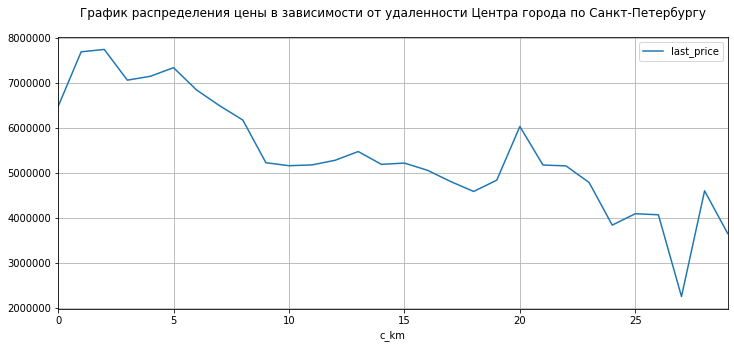

In [228]:
# Сгруппируем данные по цене за кв относительно километража и построим график зависимости цены от расстояния до центра города.
ax = df_spb.pivot_table(index='c_km', values='last_price', aggfunc='mean').plot(grid=True, figsize=(12, 5))
ax.set_title("График распределения цены в зависимости от удаленности Центра города по Санкт-Петербургу", pad = 20);

    На графике мы обнаруживаем первое резкое падение цены в райне 8 км. - обозначим эту дистанцию в качестве границы диаметра центрального округа. Теперь построим срез данных по дистанции от центра города.

In [229]:
# Напишем функцию, которая категоризирует дистанции до центра (Центр, Не Центр) в зависимости от расстояния до центра в км.
def category_distance(dis):
    if dis <= 8000:
        return 'до 8 км - Центр'
    return 'более 8 км'
df_spb['category_distance'] = df_spb['cityCenters_nearest'].apply(category_distance)

In [230]:
# Выделим и сохраним в новый датафрем данные, отсортированные по Центру.
df_spb_center = df_spb.query('category_distance == "до 8 км - Центр"') 
# Посчитаем, сколько квартир в центральном районе 
print('В центральном районе число квартир: {}'.format(len(df_spb_center)))


В центральном районе число квартир: 1300


Теперь приступим к анализу характеристик квартир в центральном районе г. Санкт-Петербург. Оценим следующие характеристики: площадь, цена, число комнат, высота потолков

In [231]:
# Создадим дополнительный датафрейм в срезе 4 необходимых переменных 
typical_parms_center = df_spb_center[['last_price', 'rooms', 'total_area', 'ceiling_height']]
# Для удобства интерпретации графиков выведем описательные статики по этим переменным 
typical_parms_center.describe()

,last_price,rooms,total_area,ceiling_height
count,"1,300.00","1,300.00","1,300.00","1,300.00"
mean,"7,009,775.64",2.12,60.38,2.70
std,"2,186,403.25",0.92,20.32,0.09
min,"1,686,000.00",0.00,12.00,2.40
25%,"5,300,000.00",1.00,44.10,2.70
50%,"6,800,000.00",2.00,58.70,2.70
75%,"8,505,000.00",3.00,73.78,2.70
max,"11,866,860.00",6.00,114.20,2.92


In [232]:
# Сравним с описательной статистикой по всему городу
spb_city_parms = df_spb[['last_price', 'rooms', 'total_area', 'ceiling_height']]
spb_city_parms.describe()

,last_price,rooms,total_area,ceiling_height
count,"11,193.00","11,193.00","11,193.00","11,193.00"
mean,"5,392,117.92",1.90,52.15,2.65
std,"1,936,896.18",0.88,17.20,0.09
min,"12,190.00",0.00,12.00,2.40
25%,"3,961,140.00",1.00,39.00,2.56
50%,"4,900,000.00",2.00,48.00,2.70
75%,"6,450,000.00",3.00,62.30,2.70
max,"11,866,860.00",6.00,114.20,2.92


    Данные описательной статистики центрального района и всего города свидетельствуют о ряде специфических свойств распределения переменных. В центральном районе средняя цена квартир на 1.5 млн выше аналогичной цены по всему городу. Количество комнат в центральном районе и по всему городу в целом (в среднем) тяготеет к 2 (хотя в центральном райне большее количество комнат встречается, как ни странно, чаще). Средняя общая площадь квартир в центральном районе на 8 кв.м выше, чем по городу в целом. Высота потолков в центральном районе также предсказуемо, в среднем, несколько выше, чем по всему городу, в целом.

Посмотрим на распределение величин более детально в срезе гистограмм распределения и плотности распределения характеристик.

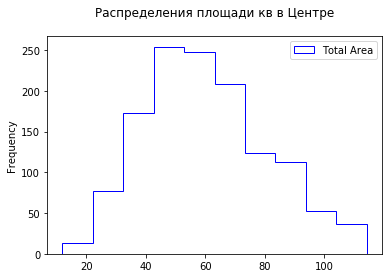

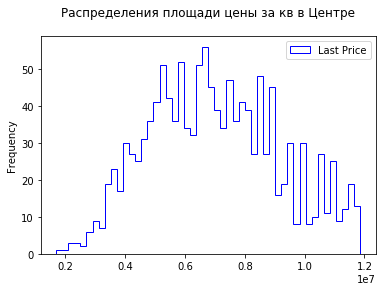

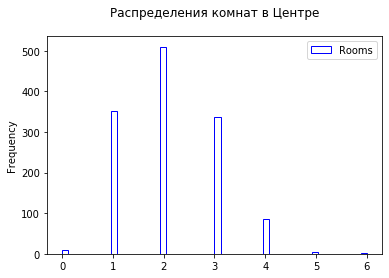

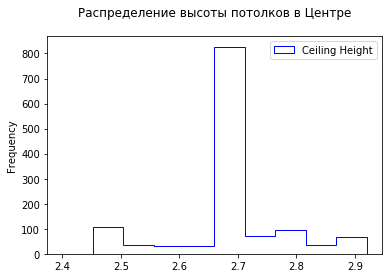

In [233]:
# Построем гистограммы распределения исследуемых величин
ax = df_spb_center.plot(kind='hist', y='total_area', histtype='step', label='Total Area', color = 'blue')
ax.set_title("Распределения площади кв в Центре", pad = 20);
ax = df_spb_center.plot(kind='hist', y='last_price', histtype='step', bins=50, label='Last Price', color = 'blue')
ax.set_title("Распределения площади цены за кв в Центре", pad = 20);
ax = df_spb_center.plot(kind='hist', y='rooms', histtype='step', bins=50, label='Rooms', color = 'blue')
ax.set_title("Распределения комнат в Центре", pad = 20);
ax = df_spb_center.plot(kind='hist', y='ceiling_height', histtype='step', bins=10, label='Ceiling Height', color = 'blue')
ax.set_title("Распределение высоты потолков в Центре", pad = 20);

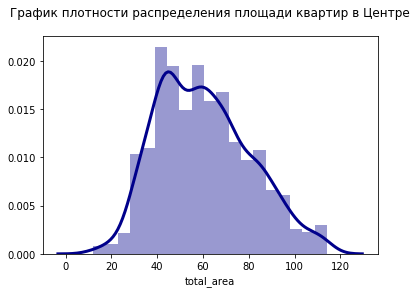

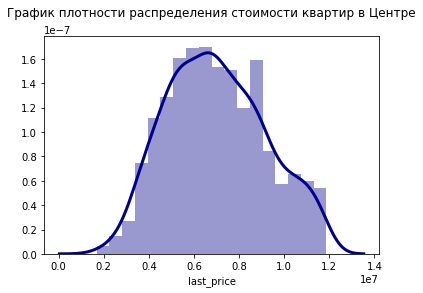

In [234]:
# Построим графики плотности распредения площади и стоимости кв. в Центре (т.е. для непрерывных величин)
sns.distplot(df_spb_center['total_area'], kde = True,
             color = 'darkblue', 
             kde_kws={'linewidth': 3},
             rug_kws={'color': 'black'})
plt.title("График плотности распределения площади квартир в Центре", pad = 20)
plt.show()

sns.distplot(df_spb_center['last_price'], kde=True,
             color = 'darkblue', 
             kde_kws={'linewidth': 3},
             rug_kws={'color': 'black'})
plt.title("График плотности распределения стоимости квартир в Центре", pad = 20)
plt.show()

    Исходя из графиков мы можем сделать следующие выводы:
        Общая площадь и стоимость квартир графически близки к нормальному распределению (в центре количество квартир достигнуло 1300, в статистике объем репрезентативных выборок не редко достигает 1600 наблюдений) - распределение стоимости квартир выглядит унимодальным, оба распределения симметричны. Большая часть квартир в центре обладают стоимостью в 6-6.5 млн. руб. с стандартным отклонением в 2 млн. руб.
        Количество комнат распределено симметрично - в наибольшей степени представлены 2-е квартиры, чуть в меньшей степени - 1-е, 3-е кв., совсем редко продаются студии и 5,6-е кв. 
        Высота потолков в среднем по центру - 2.7, но здесь примечательно, что кв. с большей высотой потолков встречаются также часто, как и с самыми невысокими (стандартными) потолками - в среднем по выборке центрального района города несколько сотен квартир с высотой потолков выше среднего встретится. 


Приступим к сравнительному анализу детерменант ценообразования квартир в Центральном районе и по всему г.Санкт-Петербургу.

In [235]:
# Выведем сводную таблицу с коэффициентами корреляции Пирсона по центральному району и по всему городу
data_corr_compare = (
    pd.DataFrame(df_spb_center.corr()['last_price'])
    .join(pd.DataFrame(df_spb.corr()['last_price']),
    lsuffix='_до 8 км', rsuffix='_по всему городу')
)
data_corr_compare.sort_values(by='last_price_до 8 км', ascending=False)

,last_price_до 8 км,last_price_по всему городу
last_price,1.00,1.00
total_area,0.72,0.79
living_area,0.58,0.64
kitchen_area,0.49,0.53
rooms,0.45,0.49
coeff_liv_area,0.41,0.46
cost_per_metr,0.27,0.41
ceiling_height,0.18,0.26
floor,0.17,0.13
floors_total,0.17,0.19


        В целом, общая динамика связи факторов ценообразования по центральному району в сравнении со всем городом - сохраняется (если принять к сравнению расклад корреляционных коэффициентов по всему городу - но и квартир по Санкт-Петербургу в выборке сильно больше, чем по всем городам вместе взятым). Однако, следует отметить, что коэффициенты корреляции по центральным квартирам незначительно, но все-таки ниже (на сотые доли), чем коэффициенты по всему городу. Возможно, это обусловлено общей блазированностью стоимости центральных квартир относительно расположения.
        Итак, общая площадь, жилая площадь и площадь кухни по центральному району, как и по всему городу - факторы, в наибольшей степени определяющие ценообразование продаваемых квартир. Сами коэффициенты довольно высокие (почти от 0.5 до 0.7). Чуть ниже коэффициент по критерию - количество комнат - но все же довольно высокий. Стоимость кв.метра жилья определяет общую стоимость жилья сильно меньше, чем по городу и городам, в целом - это говорит о партикулярной специфике определения стоимости центральных квартир. Высота потолков, общее количество этаже и этаж квартиры - факторы, очень слабо определяющие цену квартиру в центральном районе (чуть более значим почти 0.3 коэффициент по высоте потолков по городу в целом). Тем не менее, критерий этажа квартиры несколько более определяет цену, нежели по всему городу, в целом. 
        Из обратной связи (отрицательных коэффициентов) наибольший интерес вызывает довольно низкий показатель (относительно коэффициентов по всем городам) критерия "близость центра" - для квартир по городу, в целом, он ниже 0.3., т.е. просел в своей релевантности. Из наиболее сильной отрицательной связи - коэффициент отношения площади кухни к жилой - но здесь нужно быть очень смелым, чтобы утверждать связь, принимая во внимание специфику аппроксимаций этих значений на этапе заполнения пропусков и допущений, которые мы приняли в этом процессе (напомню,почти в 200 случаев сумма жилой площади и площади кухни несколько превысила общую площадь в результате апроксимации по медианным значениям.

Посмотрим детально на распределение величин числа комнат, этаж, удалённость от центра, дата размещения объявления в сравнении Центр-весь город. 

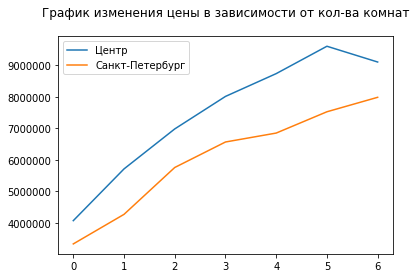

In [238]:
# Построим график изменения цены в зависимости от числа комнат
pivot_room_center = df_spb_center.pivot_table(index='rooms', values='last_price')
pivot_room_city = df_spb.pivot_table(index='rooms', values='last_price')
plt.Figure(figsize=(15,10))
plt.plot(pivot_room_center, label = 'Центр')
plt.plot(pivot_room_city, label = 'Санкт-Петербург')
plt.title("График изменения цены в зависимости от кол-ва комнат", pad = 20);
plt.legend();

In [239]:
# Построим график изменения цены в зависимости от этажа
data_pivot_center = df_spb_center.pivot_table(index='floor_category', values='last_price')
data_pivot_city = df_spb.pivot_table(index='floor_category', values='last_price')

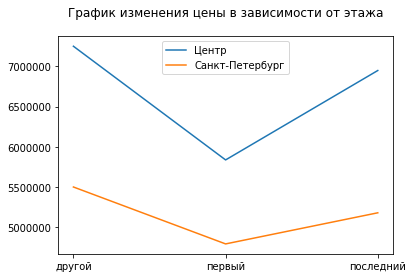

In [240]:
plt.Figure(figsize=(15, 10))
plt.plot(data_pivot_center, label = 'Центр')
plt.plot(data_pivot_city, label = 'Санкт-Петербург')
plt.title("График изменения цены в зависимости от этажа", pad = 20)
plt.legend();

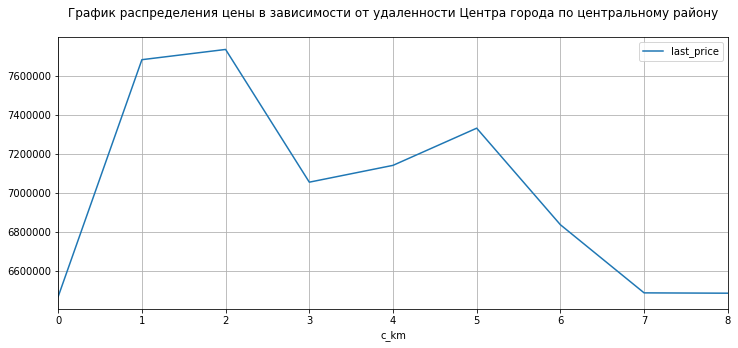

In [241]:
# Сгруппируем данные по цене за кв относительно километража и построим график зависимости цены от расстояния до центра города
# по квартирам в Центре
ax = df_spb_center.pivot_table(index='c_km', values='last_price', aggfunc='mean').plot(grid=True, figsize=(12, 5))
ax.set_title("График распределения цены в зависимости от удаленности Центра города по центральному району", pad = 20);


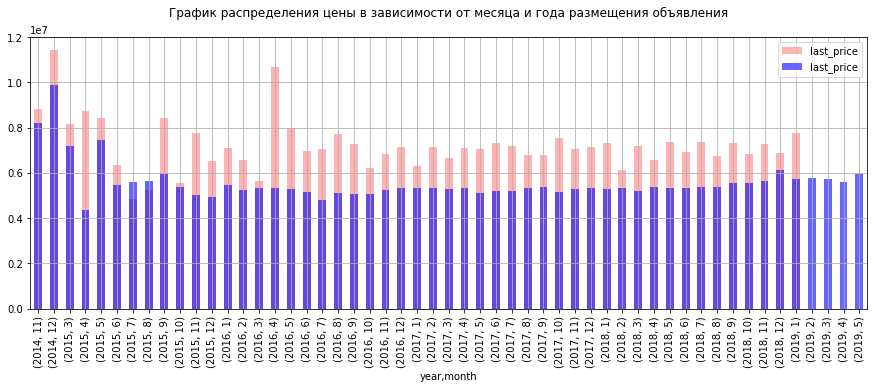

In [242]:
# Построим график распределения стоимости квартиры в зависимости от года и месяца размещения объявления квартир в Центре
ax = df_spb_center.groupby(['year', 'month']).agg({'last_price': 'mean'}).plot(kind='bar', grid=True, figsize=(15, 5), color = 'r', alpha=0.3)
df_spb.groupby(['year', 'month']).agg({'last_price': 'mean'}).plot(ax=ax, kind='bar', grid=True, figsize=(15, 5), color = 'b', alpha=0.6)
plt.legend()
ax.set_title("График распределения цены в зависимости от месяца и года размещения объявления", pad = 20);

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> 

Чтобы не выводилась техническая информация над графиками: 'Text(0.5, 1.0, 'График распределения цены в зависимости от месяца и года размещения объявления')' - можно ставить ; в конце кода (добавил в ячейку ниже).
</div>

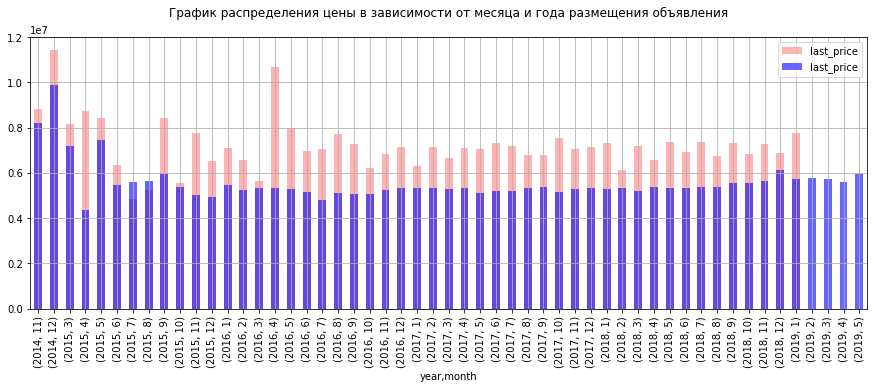

In [243]:
# Построим график распределения стоимости квартиры в зависимости от года и месяца размещения объявления квартир в Центре
ax = df_spb_center.groupby(['year', 'month']).agg({'last_price': 'mean'}).plot(kind='bar', grid=True, figsize=(15, 5), color = 'r', alpha=0.3)
df_spb.groupby(['year', 'month']).agg({'last_price': 'mean'}).plot(ax=ax, kind='bar', grid=True, figsize=(15, 5), color = 'b', alpha=0.6)
plt.legend()
ax.set_title("График распределения цены в зависимости от месяца и года размещения объявления", pad = 20);

### Вывод
    Итак, 
        В центральном районе г. Санкт-Петербург распределение стоимости квартир несколько отличается от последнего по всему городу в целом. Так, с одной стороны, с увеличением количества комнат до 5 - цена растет, однако после цена идет на спад (возможно, это может быть объяснено тем, что и количество 6-х квартир по центральному району в датасете меньше, чем в по всей территории города, таким образом, несколько квартир в центре меньшей стоимостью (например, квартиры в плохом состоянии) дают такой крен.
        В центральном районе цена за квартиру в зависимости от этажа, варьируется схожим образом, что и квартиры по всему городу: цены за первый и за последний этаж ниже, чем за квартиры, расположенные на промежуточных этажах.
        В центральном районе неоднозначная динамика распределения цены в зависимости от удаленности от центра: на графике два пика в стоимости (1-2 км. и 5 км.). Цена за квартиры в самом центре самая высокая, затем она падает и постепенно растет в зависимости от удаленности от центра до 5 км. Далее цена резко падает. Подобная динамика может быть объясненина тем, что как такого понятия центра в городе Санкт-Петербург не существует - центральные квартиры могут считаться как расположенные на Петроградке, так и на Васильевском острове на 12 линии, что довольно далеко от материковой части города.
        В центральном районе ш. Санкт-Петербург сохраняется общая динамика как по другим городам, так и по всему городу: данные за 2014 год представлены лишь за 2 последних месяца. По нему мы наблюдаем общее существенное снижение цен за квартиры по всему городу (с января 2015 года). После небольших колебаний цен в первые месяцы 2015 года, цена за квартиры устанавливается до 5.-5.5 млн. и сохраняет свой тренд чрезвычайно медленного роста вплоть до мая 2019 года - лишь в декабре 2018 года средняя цена за вквартиры впервые превысила отметку в 6 млн. Чрезвычайное падение цен с января 2015 года может быть обусловлена общим социально-экономическим и политическим кризисом в стране - стремительной девальвации рубля на фоне колласального падения цен на нефть и введения экономических санкций в период эскалации военно-политического конфликта на Востоке Украины. В период с 2014 по 2018 годы резко сократилась потребительская корзина российского населения, широкие слои оказались паумперизированы, с 2015 по 2016 годы выросло число неоплачиваемых отпусков, стремительно падала заработная плата, количество реальных доходов, закрывались предприятия. Вырос отток экспатов в зарубежные страны, что сопровождалось продажей купленной в России недвижимости. Это непосредственным образом могло отразиться на падении цен за квартиры и очень медленный рост последних. 
        График распределения цен за квартиры по центральному району Санкт-Петербурга не столь блазированный. Он включает в себя общий тренд снижения цены за квартиры с января 2015, однако драматическое падение переживает лишь летом 2015 года. В апреле 2016 года цена возвращается фактически к докризисному состоянию и после очередного падения сохраняет общий тренд роста средней цены за квартиры с ноября 2016 года. 
        Что же касается сезонности по всему городу, то в среднем к сентябрю-декабрю цена несколько подрастает, летом падает. По центральному району Санкт-Петербурга ситуация обратная: летом цена  среднем выше,но к осени падает, весной цена идет на рост.
    

### Шаг 5. Общий вывод

    Технический вывод
        В результате преподготовки данных: замены пропущенных значений на основе апроксимации данных по значениям альтернативных переменных, удалении пропущенных значений, не влияющих на общий характер распределения, избавлния от статистических выбросов - экстремально высоких и редких значений переменных - мы подготовили релевантный для анализа датасет, состоящий из 17874 квартир в срезе 28 переменных, выражающих физические, топологические и рыночные характеристики квартир, а также некоторые аналитические отношения.

        Нами было принято оставить в датасете некоторые чрезвычайно редкие и контр-интуитивные значения переменных, которые существенным образом представлены в выборке - например, объявления, которые сняли с публикации через 1-30 дней после размещения. С одной стороны, с точки зрения статистики, эти значения не являются выбросами и укладываются в 1.5 межквартильных размаха переменной, с другой - гепотетически в столь короткий срок реализовать кватиру невозможно, а значит, объявление были сняты по альтернативной причине, например, собственник передумал продавать недвижимость. Вопрос удаления из выборки подобных наблюдений остается открытым для дальнейшего анализа. 

        В процессе замены пропущенных значений на медианные и средние значения в рамках альтернативных переменных проявилась структурная проблема данных - в некоторых случая до 80% значений переменных отсутствуют по целым населенным пунктам (например, расстояние до центра города). Это заставило оставить до 5 тысяч наблюдений по некоторым признакам (например, близость центра и аэропорта) не заполненными.

        В большинстве случаев, однако, пропущенные значения являлись следствием отсутствия как таковых подобных признаков, содержащихся в переменных, у квартир. Например, пропуски в наличии балкона, апартамент / нет, близость аэропорта (пропуски по этому значению присутствуют и у квартир по г. Санкт-Петербург), наличие кухни (например, в квартирах с 0 комнат - студий или свободной планировки) и т.д. Здесь примечательно, что значения в пропусках по наличию парков в радиусе 300 м., а также по близости центру практически полностью совпадают в смысле совместной встречаемости у квартир, что также свидетельствует о неслучайной природе пропусков (никаких парков в радиусе 300 метров у квартир может не быть). 

        Не меньши интерес вызвал вывод о том, что более 300 исследуемых городов по рынку реализации недвижимости - являются плотной сетью населенных пунктов Ленинградской области и, в частности, ее агломирации. В то время как расстояние до центра отмерено от географического центра города Санкт-Петербург.

        В процессе исследования распределения статистических выбросов мы пришли к выводу, что в объявлениях о продажах квартир присутствуют также объявления о продаже коммерческой недвижимости (например, кв. площадью 900 кв.м., кв с потолками в 100 м., и ценой, превышающей 700 млн. Аьтернативной интерпретацией является более опасный поинт для выводов данного исследования: ошибок в заполнении данных. Однако здесь следует отметить, что экстремально высокие значения в площади, цене и высоте потолков все же относительно надежно представлены в выборке - речь идет не о единицах, а десятках и сотнях подобных значений. Это же касается объявлений о продаже квартир 12 кв.м. стоимостью 12 тысяч рублей - что это за недвижимость? (за эту цену не купить даже гараж). Возможно, в данных, таким образом, оказались "зарыты" объявления об аренде, например, студий подобной площади, логи ("следы") которого оказались представлены в данных. Природа происхождения таких значений, к которым нельзя применить статистический критерий для исключений (например, кв в 12 тысяч рублей не является выбросом в рамках распределения) - тема более детального анализа.

    Аналитический вывод
        В рамках разведовательного анализа ценообразования квартир в Санкт-Петербурге и Ленинградской области мы пришли к следующим заключениям.
        В срезе 4 лет объявлений (репрезентативных данных) о продаже квартир мы наблюдаем устойчивый тренд динамики ценообразования как по всем городам Лен обл., так и по Санкт-Петербургу. С января 2015 года драматическое падение цен на квартиры и чрезвычайно медленный, сдерженный, пологий но прослеживаемый рост средней цены по населенным пунктам до 2019 года. В рамках промежуточных выводов мы предположили связь падения цен на недвижимость со структурным социально-экономическим кризисом в РФ, в целом, девальвацей рубля, ростом безработицы, сокращения зарплат, закрытием предприятий (в частности, западных автопромов Ford в Санкт-Петербурге, например), сокращением доли малого-среднего бизнеса, выход западных капиталов из страны, вовзращения экспатов и продажа ими недвижимости. При этом, мы отметили и сезонность цен продаж квартир по месяцам: по всем городам цены на недвижимость вырастают от сентября к декабрю, в то время как летом цены, в среднем, ниже. Другая картина по 1300 городам центрального района г. Санкт-Петербург - там сезонность иная - весной-летом стоимость квартир растет , по сравннию с осенью-зимой. Возможно,это объясняется туристическим сезоном. Однако утвердительного объяснения дать невозможно, ввиду того, что квартиры - долгосрочная инвестиция, стратегию которой определяют сложные, устойчивые, фундаментальные факторы, однако не день недели (так как это товары не FMCG)

        Что же касется ключевых факторов, определяющих стоимость квартиры - то, в целом, исходя из выводов корреляционного анализа и графиков совместного распределения, они довольно устойчивы в трех срезах: по всем городам, по городу Санкт-Петербург, по центральному району города Санкт-Петербург (8-й км), однако, есть и свои особенности. Итак, речь идет о трех наиболее сильных предикторах: общая площадь, жилая площадь, площадь кухни, количество комнат - от этих характеристик в большей степени зависит цена за кв. по всем трем подвыборкам. Этаж и общее количество этажей, как это ни странно, оказались наименее значимым факторами, определяющими цену жилья, но все же значимыми - в наименьшей степени по Санкт-Петербургу, в частности, по центральному району. Что касается наиболее сильных отрицательных коэффициентов , т.е. обратной связи, то предсказумым образом по всей выборке наиболее значимым оказался фактор близости к центру - он несколько слабже, но значим по Санкт-Петербургу. 

        Коэффициенты отношения жилой площади к общей, площади кухник к общей, цены за квадратный метр в свете факторов, определяющих цену за жилье, заслуживают отдельного внимания. 

        Коэффициент корреляции цены за квадратный метр и цены за квартиру отражает наличие связи между стоимостью квартиры и рыночной ценой - своеобразная метрика. По всем городам он составляет 0.62, по Санкт-Петербургу 0.41, по центральному району г.Санкт-Петербург 0.27. То есть по центральному району Санкт-Петербурга цену за квартиру самые неустойчивые и блазированные - локация определена центральностью, но цена за кв. м. все же остается значимой. В центральном районе Санкт-Петербурга обилие дореволюционного фонда и сильно меньше новостроек, чем по городу в целом - цена за кв. м. дореволюционного фонда сугубо партикулярна, индивидуальна и зачастую зависит от понимания собственника этой цены. Говорить о центральном районе также сложно - точнее о его границах. К центральным районам могут относится дома, расположенные на 12 линии Васильевского острова и Большом Петроградском проспекте или Елагином острове, что сильно дальше в радиусе 8 км. Между тем, цены в таких районах могут быть чрезвычайно сильно определены не рынком, а именно - дореволюционным фондом, близостью памятников архитектуры и пр. 

        Коэффициент корреляции отношения жилой площади к общей и цены составляет по всей выборке, по Санкт-Петербургу и по центральному району г.Санкт-Петербург 0.39, 0.41, 0.46 - соответственно, т.е. статистически значимый. В то же время, коэффициент корреляции отношения кухонной площади к общей и цены составляет -0.41, -0.43, - 0.49 - то есть настолько же сильная отрицательная связь. Эти коэффициенты - мы высчитывали для математического вычисления пропущенных значений в жилой площади и площади кухни - в отличии от столбца living_to_total, kitchen_to_total - эти значения оказались значимы.

        С ростом числа комнат цена за квартиру растет: от студий или своодной планировки с 0 комнат до 1-й квартиры, от 3-й до 5-й квартир цена растет менее стремительно, нежели от 1-й до и 4-й и 6-й. В центральном районе г.Санкт-Петербурга цена за 6-е кв падает - возможно, следствие слабой представленности категории среди продаваемых квартир или издержки старого дореволюционного фонда (коммуниальных расселянных квартир) - т.е, фактор косметического состояния квартиры.

        Факторы, которые оказались не значимы или значимы слабо: высота потолков, общее количество этажей, близость парков, прудов, балконов, количество дней, которое размещено объявление.

        Перспектива анализа:
    Интерес вызывает когортный анализ по площади кв, числу комнат, соотношения значения площади кухни в центральном районе и за его пределами.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> 

Прекрасный вывод!
</div>

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод